Data Source: https://www.kaggle.com/c/home-credit-default-risk

# Import library(s)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data Dictionary

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/dataset/home_credit'
data_cols = pd.read_csv(path+"/HomeCredit_columns_description.csv", encoding='unicode_escape')

# Load Dataset

In [ ]:
dataset = pd.read_csv(path+"/application_train.csv")
pd.set_option('display.max_columns', None)
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
cols_num_only = dataset.select_dtypes(include=np.number).columns.tolist()
cols_num_only.pop(0)
cols_cat_only = dataset.columns[~dataset.columns.isin(cols_num_only)]

In [ ]:
pd.set_option('display.max_colwidth', 1000)
data_cols\
    .loc[(data_cols.Table == 'application_{train|test}.csv') 
              & (data_cols.Row.isin(['TARGET','DAYS_EMPLOYED','NAME_TYPE_SUITE','DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']))] \
              .drop("Unnamed: 0",axis=1 )

# data_cols.loc[(data_cols.Table == 'application_{train|test}.csv')]


,Table,Row,Description,Special
1,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
7,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
9,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN
11,application_{train|test}.csv,NAME_TYPE_SUITE,Who was accompanying client when he was applying for the loan,NaN
18,application_{train|test}.csv,DAYS_EMPLOYED,How many days before the application the person started current employment,time only relative to the application
91,application_{train|test}.csv,OBS_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings with observable 30 DPD (days past due) default,NaN
92,application_{train|test}.csv,DEF_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings defaulted on 30 DPD (days past due),NaN
93,application_{train|test}.csv,OBS_60_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings with observable 60 DPD (days past due) default,NaN
94,application_{train|test}.csv,DEF_60_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings defaulted on 60 (days past due) DPD,NaN
95,application_{train|test}.csv,DAYS_LAST_PHONE_CHANGE,How many days before application did client change phone,NaN


# Data Understanding Notes


Last understanding
- Table: Application Train
- Column: DONE
- Time: 07/03/2021 21:47


## Notes


1. DAYS_BIRTH = birth date - date of accepted loan
2. DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH = date of accepted loan - date of column context (read data dictionary)

# Identify which activity should be done

by understanding each column means, knowing what each row means and also checking for null and duplicate values

## Copy Main Dataset

In [ ]:
pd.set_option('display.max_rows', None)

## Check null

In [ ]:
# contain null values
cols_null = pd.DataFrame(dataset.isnull().sum())
cols_null = cols_null.reset_index().rename(columns={'index': 'Title', 0: 'Total'})
cols_null.loc[:, 'Percentage'] = cols_null.apply(lambda row: row['Total']/dataset.shape[0] * 100, axis=1)
cols_null[cols_null['Percentage'] > 55]
# cols_null.loc[cols_null['Total'] > 0].count()['Title']

,Title,Total,Percentage
21,OWN_CAR_AGE,202929,65.990810
41,EXT_SOURCE_1,173378,56.381073
45,BASEMENTAREA_AVG,179943,58.515956
47,YEARS_BUILD_AVG,204488,66.497784
48,COMMONAREA_AVG,214865,69.872297
52,FLOORSMIN_AVG,208642,67.848630
53,LANDAREA_AVG,182590,59.376738
54,LIVINGAPARTMENTS_AVG,210199,68.354953
56,NONLIVINGAPARTMENTS_AVG,213514,69.432963
57,NONLIVINGAREA_AVG,169682,55.179164


## Check duplicated row

In [ ]:
dataset.duplicated().sum()

0

## Notes

1. Analyze whether to replace or drop null values

# Analyze Data (use statistics and EDA)

Data distribution each column, interaction between one to another data, visualize, **get insight of data**

## Question to be analyzed

1. Apakah ada perbedaan distribusi penghasilan dari orang yg gagal/sukses bayar?
2.  Orang yang penghasilannya di bawah rata2, berapa nominal pinjamannya? berapa persentase yang gagal bayar?
3. Orang yang penghasilannya di atas rata2, berapa nominal pinjamannya? berapa persentase yang gagal bayar?
2. Bagaimana korelasi antar data numerik?
3. Apakah orang yg gagal bayar karena cicilan per tahunnya terlalu besar?
4. Apakah orang yang gagal bayar karena belum bekerja?
6. Apakah orang yang gagal bayar terdapat orang-orang di lingkungannya yang memiliki pinjaman aktif?
7. Apakah orang yang gagal bayar terdapat orang-orang di lingkungannya yang gagal bayar juga?
8. Tipe kontrak apa yang paling banyak gagal/sukses bayar?
9. Apakah korelasi antara status pernikahan dengan gagal/sukses bayar pinjaman?
10. Bagaimana korelasi antara orang yang gagal/sukses bayar dengan pengisian kontak personal?
11. Apakah rating wilayah provinsi maupun kota mempengaruhi gagal/sukses bayar?
12. Berapa rata-rata, dan median orang yang gagal/sukses bayar?
13. Berapa rata-rata dan median lama orang yang gagal/sukses bayar bekerja?
14. Bagaimana persebaran jenis pekerjaan klien tiap pinjaman?
15. Bagaimana korelasi antara penilaian ext_source dengan gagal/sukses bayarnya suatu pinjaman?
16. Bagaimana persebaran tipe organisasi tiap pinjaman?
17. apakah tipe organisasi berkorelasi dengan sukses/gagalnya pembayaran?

## Descriptive Analysis

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
dataset.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.

## Apakah ada perbedaan distribusi penghasilan dari orang yg gagal/sukses bayar?

In [ ]:
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,nan,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,nan,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,nan,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.56,0.73,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

### Persebaran penghasilan klien tiap pinjaman baik yang sukses maupun gagal bayar

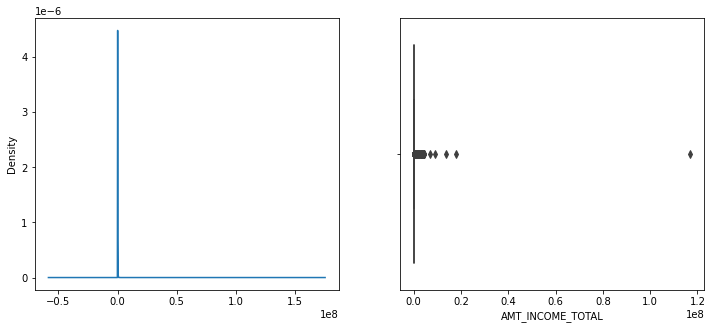

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
dataset['AMT_INCOME_TOTAL'].plot.density()
plt.subplot(1, 2, 2)
sns.boxplot(data=dataset, x="AMT_INCOME_TOTAL")
plt.show()

### Remove outliers untuk semua penghasilan klien tiap pinjaman yang sukses maupun gagal bayar

In [ ]:
q1 = np.quantile(dataset['AMT_INCOME_TOTAL'], 0.25, axis=0)
q3 = np.quantile(dataset['AMT_INCOME_TOTAL'], 0.75, axis=0)
# interquartile
iqr = (q3 - q1) * 1.5
#lower
lower = q1 - iqr
#upper
upper = q3 + iqr
print(lower)
print(upper)


-22500.0
337500.0


In [ ]:
df_income_all = dataset.loc[(dataset['AMT_INCOME_TOTAL'] < upper) & (dataset['AMT_INCOME_TOTAL'] > lower)]

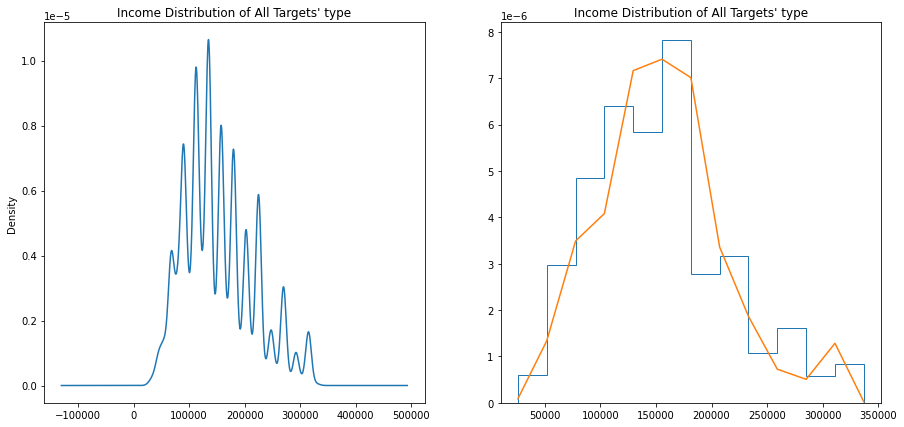

In [ ]:
clean_income = df_income_all['AMT_INCOME_TOTAL']


plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1)
plt.title("Income Distribution of All Targets' type")
clean_income.plot.density()
plt.subplot(1, 2, 2)
plt.title("Income Distribution of All Targets' type")
density = stats.gaussian_kde(clean_income)
n, x, _ = plt.hist(clean_income, bins=12, 
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.show()

In [ ]:
print("skewness :", df_income_all['AMT_INCOME_TOTAL'].skew())
print("kurtosis :", df_income_all['AMT_INCOME_TOTAL'].kurt())

skewness : 0.6023703248383754
kurtosis : -0.20017948262460283


### Result

Berdasarkan chart beserta nilai skewness dan kurtosis dan disimpulkan bahwa 
1. penghasilan klien hampir terdistribusi normal
0. Data penghasilan tersebar secara merata (kurtosis platykurtic)

### Income Distribution

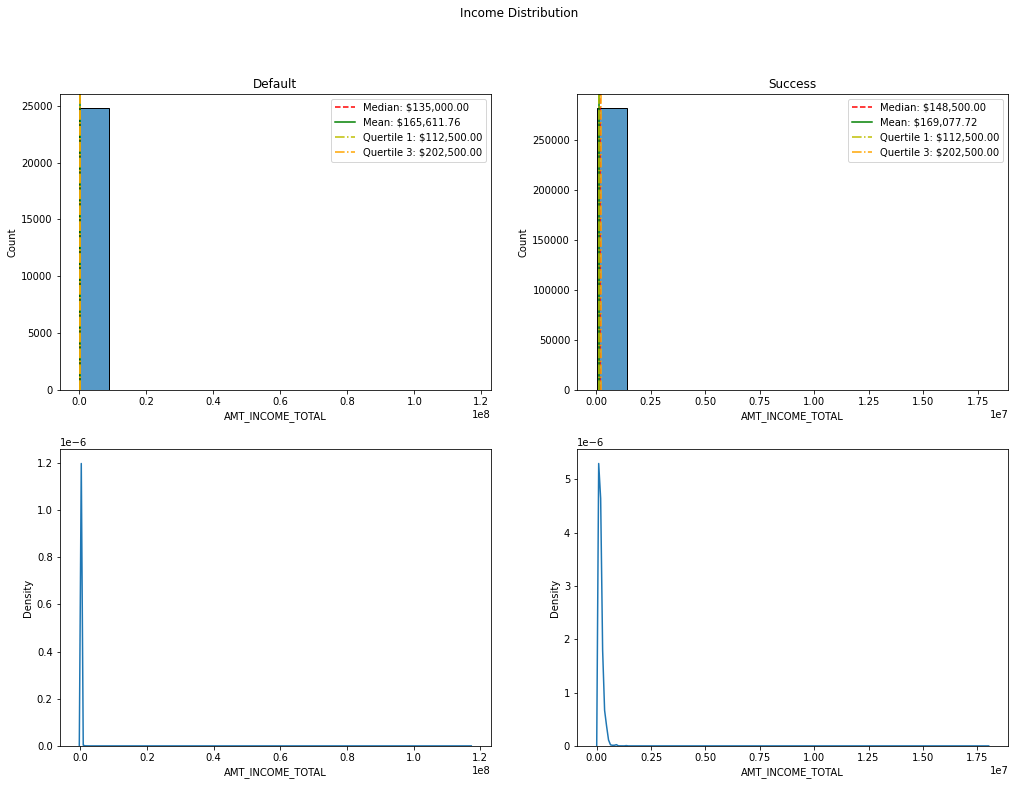

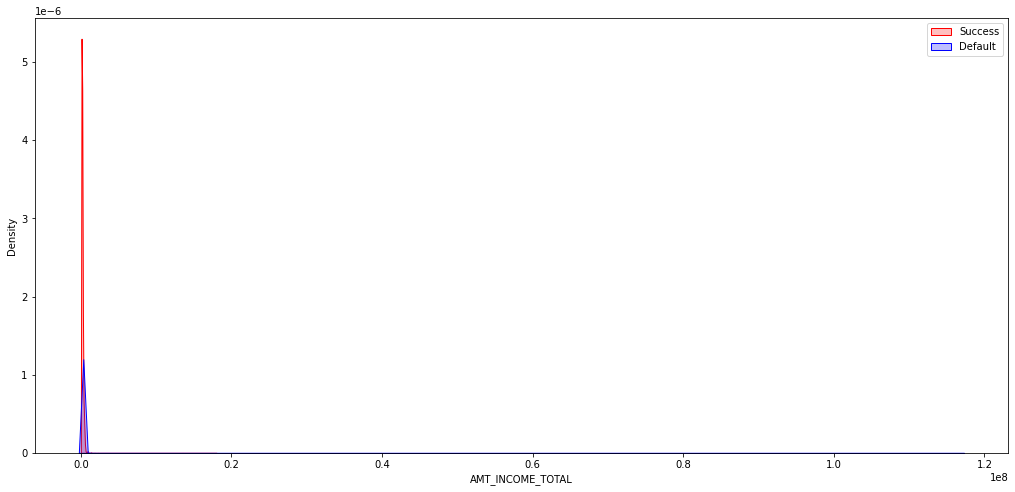

In [ ]:
df_default = dataset.loc[(dataset['TARGET'] == 1)]
df_success = dataset.loc[(dataset['TARGET'] == 0)]

income_def_mean = df_default['AMT_INCOME_TOTAL'].mean()
income_def_median = df_default['AMT_INCOME_TOTAL'].median()
income_def_mean_str = str("${:,.2f}".format(income_def_mean))
income_def_median_str = str("${:,.2f}".format(income_def_median))
income_def_q1 = np.quantile(df_default['AMT_INCOME_TOTAL'], 0.25, axis=0)
income_def_q3 = np.quantile(df_default['AMT_INCOME_TOTAL'], 0.75, axis=0)
income_def_q1_str = str("${:,.2f}".format(income_def_q1))
income_def_q3_str = str("${:,.2f}".format(income_def_q3))

income_suc_mean = df_success['AMT_INCOME_TOTAL'].mean()
income_suc_median = df_success['AMT_INCOME_TOTAL'].median()
income_suc_mean_str = str("${:,.2f}".format(income_suc_mean))
income_suc_median_str = str("${:,.2f}".format(income_suc_median))
income_suc_q1 = np.quantile(df_success['AMT_INCOME_TOTAL'], 0.25, axis=0)
income_suc_q3 = np.quantile(df_success['AMT_INCOME_TOTAL'], 0.75, axis=0)
income_suc_q1_str = str("${:,.2f}".format(income_suc_q1))
income_suc_q3_str = str("${:,.2f}".format(income_suc_q3))

fig, axes = plt.subplots(2, 2, figsize=(17,12))
fig.suptitle('Income Distribution')

axes[0,0].set_title("Default")
sns.histplot(df_default["AMT_INCOME_TOTAL"], ax=axes[0,0], bins=13)
axes[0,0].axvline(income_def_mean, color='r', linestyle='--')
axes[0,0].axvline(income_def_median, color='g', linestyle='-')
axes[0,0].axvline(income_def_q1, color='y', linestyle='-.')
axes[0,0].axvline(income_def_q3, color='orange', linestyle='-.',)
axes[0,0].legend({
                  'Median: '+income_def_median_str:income_def_median, 
                  'Mean: '+income_def_mean_str:income_def_mean,
                  "Quertile 1: "+income_def_q1_str: income_def_q1,
                  "Quertile 3: "+income_def_q3_str:income_def_q3,
                  })

sns.kdeplot(data=df_default, x="AMT_INCOME_TOTAL",ax=axes[1,0])

axes[0,1].set_title("Success")
sns.histplot(df_success, x="AMT_INCOME_TOTAL",ax=axes[0,1], bins=13)
axes[0,1].axvline(income_suc_mean, color='r', linestyle='--')
axes[0,1].axvline(income_suc_median, color='g', linestyle='-')
axes[0,1].axvline(income_suc_q1, color='y', linestyle='-.')
axes[0,1].axvline(income_suc_q3, color='orange', linestyle='-.',)
axes[0,1].legend({
                    
                  'Median: '+income_suc_median_str:income_suc_median, 
                  'Mean: '+income_suc_mean_str:income_suc_mean,
                  "Quertile 1: "+income_suc_q1_str: income_suc_q1,
                  "Quertile 3: "+income_suc_q3_str:income_suc_q3,
                  })

sns.kdeplot(data=df_success, x="AMT_INCOME_TOTAL",ax=axes[1,1])
plt.show()

plt.figure(figsize=(17.45,8))

sns.kdeplot(df_success['AMT_INCOME_TOTAL'], color='r', shade=True, Label='Success')
sns.kdeplot(df_default['AMT_INCOME_TOTAL'], color='b', shade=True, Label='Default')
plt.legend()
plt.show()  


### Income Distribution (zoomed)

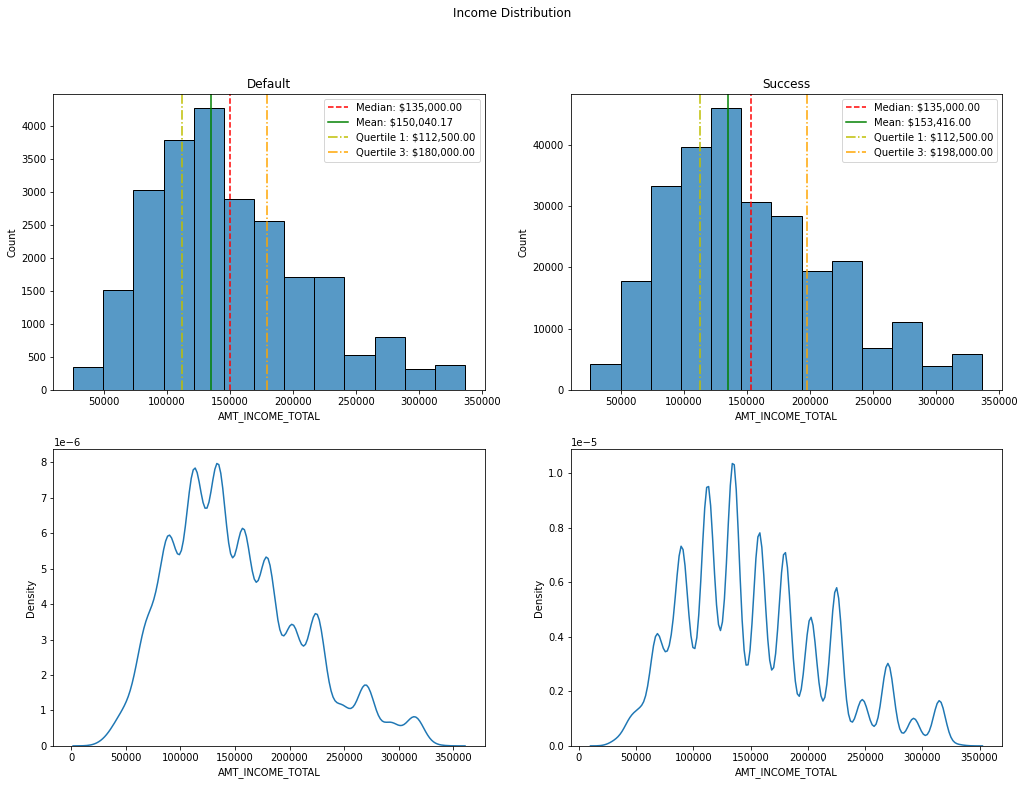

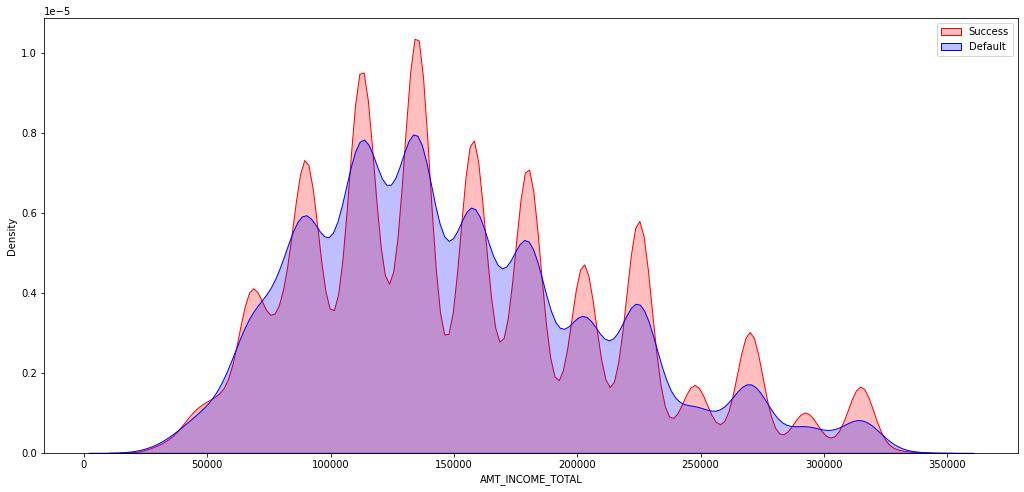

In [ ]:
df_default = dataset.loc[(dataset['AMT_INCOME_TOTAL'] < upper) & (dataset['AMT_INCOME_TOTAL'] > lower) & (dataset['TARGET'] == 1)]
clean_income_def = df_default['AMT_INCOME_TOTAL']
df_success = dataset.loc[(dataset['AMT_INCOME_TOTAL'] < upper) & (dataset['AMT_INCOME_TOTAL'] > lower) & (dataset['TARGET'] == 0)]
clean_income_suc = df_success['AMT_INCOME_TOTAL']

income_def_mean = df_default['AMT_INCOME_TOTAL'].mean()
income_def_median = df_default['AMT_INCOME_TOTAL'].median()
income_def_mean_str = str("${:,.2f}".format(income_def_mean))
income_def_median_str = str("${:,.2f}".format(income_def_median))
income_def_q1 = np.quantile(df_default['AMT_INCOME_TOTAL'], 0.25, axis=0)
income_def_q3 = np.quantile(df_default['AMT_INCOME_TOTAL'], 0.75, axis=0)
income_def_q1_str = str("${:,.2f}".format(income_def_q1))
income_def_q3_str = str("${:,.2f}".format(income_def_q3))

income_suc_mean = df_success['AMT_INCOME_TOTAL'].mean()
income_suc_median = df_success['AMT_INCOME_TOTAL'].median()
income_suc_mean_str = str("${:,.2f}".format(income_suc_mean))
income_suc_median_str = str("${:,.2f}".format(income_suc_median))
income_suc_q1 = np.quantile(df_success['AMT_INCOME_TOTAL'], 0.25, axis=0)
income_suc_q3 = np.quantile(df_success['AMT_INCOME_TOTAL'], 0.75, axis=0)
income_suc_q1_str = str("${:,.2f}".format(income_suc_q1))
income_suc_q3_str = str("${:,.2f}".format(income_suc_q3))

fig, axes = plt.subplots(2, 2, figsize=(17,12))
fig.suptitle('Income Distribution')

axes[0,0].set_title("Default")
sns.histplot(df_default["AMT_INCOME_TOTAL"], ax=axes[0,0], bins=13)
axes[0,0].axvline(income_def_mean, color='r', linestyle='--')
axes[0,0].axvline(income_def_median, color='g', linestyle='-')
axes[0,0].axvline(income_def_q1, color='y', linestyle='-.')
axes[0,0].axvline(income_def_q3, color='orange', linestyle='-.',)
axes[0,0].legend({
                  'Median: '+income_def_median_str:income_def_median, 
                  'Mean: '+income_def_mean_str:income_def_mean,
                  "Quertile 1: "+income_def_q1_str: income_def_q1,
                  "Quertile 3: "+income_def_q3_str:income_def_q3,
                  })

sns.kdeplot(data=df_default, x="AMT_INCOME_TOTAL",ax=axes[1,0])

axes[0,1].set_title("Success")
sns.histplot(df_success, x="AMT_INCOME_TOTAL",ax=axes[0,1], bins=13)
axes[0,1].axvline(income_suc_mean, color='r', linestyle='--')
axes[0,1].axvline(income_suc_median, color='g', linestyle='-')
axes[0,1].axvline(income_suc_q1, color='y', linestyle='-.')
axes[0,1].axvline(income_suc_q3, color='orange', linestyle='-.',)
axes[0,1].legend({
                    
                  'Median: '+income_suc_median_str:income_suc_median, 
                  'Mean: '+income_suc_mean_str:income_suc_mean,
                  "Quertile 1: "+income_suc_q1_str: income_suc_q1,
                  "Quertile 3: "+income_suc_q3_str:income_suc_q3,
                  })

sns.kdeplot(data=df_success, x="AMT_INCOME_TOTAL",ax=axes[1,1])
plt.show()

plt.figure(figsize=(17.45,8))

sns.kdeplot(df_success['AMT_INCOME_TOTAL'], color='r', shade=True, Label='Success')
sns.kdeplot(df_default['AMT_INCOME_TOTAL'], color='b', shade=True, Label='Default')
plt.legend()
plt.show()  


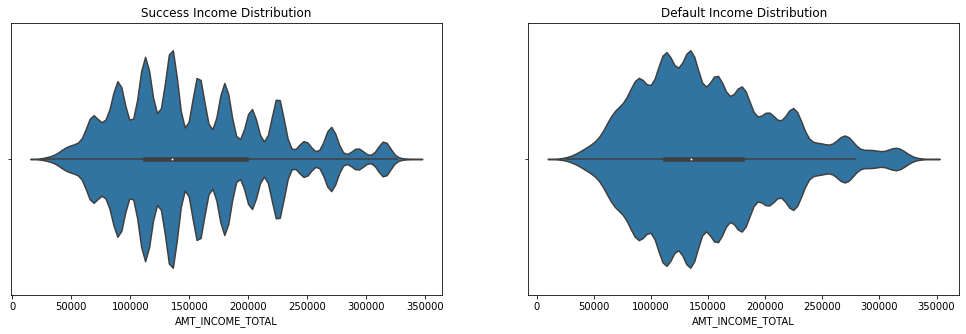

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(17,5))
axes[0].set_title('Success Income Distribution')
sns.violinplot(data=df_success, x='AMT_INCOME_TOTAL',ax=axes[0])
axes[1].set_title('Default Income Distribution')
sns.violinplot(data=df_default, x='AMT_INCOME_TOTAL',ax=axes[1])
plt.show()


In [ ]:
print("skewness gagal bayar:", df_default['AMT_INCOME_TOTAL'].skew())
print("kurtosis gagal bayar:", df_default['AMT_INCOME_TOTAL'].kurt())
print('')
print("skewness sukses bayar:", df_success['AMT_INCOME_TOTAL'].skew())
print("kurtosis sukses bayar:", df_success['AMT_INCOME_TOTAL'].kurt())

skewness gagal bayar: 0.6415931235230471
kurtosis gagal bayar: -0.034942077407430716

skewness sukses bayar: 0.5981662711180947
kurtosis sukses bayar: -0.21507675793276348


### Mean dan median penghasilan sukses dan gagal

In [ ]:
pd.pivot_table(dataset, index = ['TARGET'], 
               values=['AMT_INCOME_TOTAL'], 
               aggfunc={'AMT_INCOME_TOTAL': [np.mean, np.median, pd.Series.mode]})

AMT_INCOME_TOTAL                    
                   mean    median      mode
TARGET                                     
0             169077.72 148500.00 135000.00
1             165611.76 135000.00 135000.00

### Delete Unused Variables

In [ ]:

del df_income_all, clean_income,q1, q3, iqr, lower, upper,df_default, clean_income_def, df_success, clean_income_suc, income_def_mean, income_def_median, income_def_mean_str, income_def_median_str, income_def_q1, income_def_q3, income_def_q1_str, income_def_q3_str, income_suc_mean, income_suc_median, income_suc_mean_str, income_suc_median_str, income_suc_q1, income_suc_q3, income_suc_q1_str, income_suc_q3_str, fig, axes

### Result

Berdasarkan chart beserta nilai skewness dan kurtosis dan disimpulkan bahwa 
1. Kemiringan dari persebaran penghasilan klien positif
2. Persebarannya tidak merata
3. Rata-rata penghasilan klien yang gagal bayar yaitu 165.611,761; dan mediannya yaitu 135.000
4. Rata-rata penghasilan klien yang sukses bayar yaitu 169.077,722 dan mediannya yaitu 148.500
5. Penghasilan peminjam yang diterima oleh HC berpusat pada range 100k - 200k (middle class di amerika yang jadi segmen nya)
Meskipun penghasilannya besar (>200k) tapi orang masih ada yang kredit di HC


## Nominal Pinjaman Gagal Dibawah Rata Rata Penghasilan

In [ ]:
df_default = dataset.loc[(dataset['TARGET'] == 1)]
df_success = dataset.loc[(dataset['TARGET'] == 0)]

In [ ]:
df_default.loc[df_default['AMT_INCOME_TOTAL'] < dataset['AMT_INCOME_TOTAL'].mean()].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15851.00,15869.00,15869.00,15869.00,15869.00,15869.00,3928.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,6152.00,15826.00,11844.00,6210.00,5187.00,6512.00,4136.00,3738.00,5810.00,6256.00,6348.00,3978.00,5163.00,3885.00,6348.00,3773.00,5604.00,6210.00,5187.00,6512.00,4136.00,3738.00,5810.00,6256.00,6348.00,3978.00,5163.00,3885.00,6348.00,3773.00,5604.00,6210.00,5187.00,6512.00,4136.00,3738.00,5810.00,6256.00,6348.00,3978.00,5163.00,3885.00,6348.00,3773.00,5604.00,6567.00,15843.00,15843.00,15843.00,15843.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,15869.00,12765.00,12765.00,12765.00,12765.00,12765.00,12765.00
mean,276935.58,1.00,0.46,115078.28,481786.73,23180.37,420489.03,0.02,-14833.28,50778.46,-4570.90,-2716.30,15.17,1.00,0.86,0.26,1.00,0.25,0.04,2.17,2.21,2.19,11.64,0.01,0.03,0.02,0.12,0.30,0.21,0.38,0.39,0.40,0.10,0.08,0.97,0.74,0.04,0.05,0.14,0.19,0.20,0.06,0.09,0.09,0.01,0.02,0.10,0.08,0.97,0.75,0.03,0.05,0.14,0.19,0.20,0.06,0.09,0.09,0.01,0.02,0.10,0.08,0.97,0.75,0.04,0.05,0.14,0.19,0.20,0.06,0.09,0.09,0.01,0.02,0.08,1.50,0.20,1.48,0.15,-765.22,0.00,0.78,0.00,0.02,0.07,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.20,0.25,1.93
std,102716.47,0.00,0.75,30861.54,294742.98,10345.56,262822.55,0.01,4376.24,128560.30,3316.22,1518.06,13.22,0.00,0.35,0.44,0.04,0.43,0.20,0.95,0.48,0.48,3.23,0.11,0.18,0.15,0.32,0.46,0.41,0.20,0.21,0.21,0.10,0.07,0.07,0.11,0.06,0.11,0.10,0.12,0.14,0.08,0.08,0.09,0.04,0.05,0.10,0.07,0.08,0.10,0.06,0.11,0.10,0.12,0.14,0.08,0.09,0.10,0.04,0.05,0.10,0.07,0.07,0.11,0.06,0.11,0.10,0.12,0.14,0.08,0.08,0.09,0.04,0.06,0.09,2.40,0.53,2.38,0.44,735.75,0.01,0.41,0.00,0.12,0.26,0.01,0.21,0.04,0.00,0.06,0.00,0.02,0.03,0.02,0.07,0.01,0.08,0.02,0.02,0.02,0.08,0.11,0.20,0.68,0.62,1.88
min,100031.0

In [ ]:
del df_default, df_success

##Persentase Gagal Bayar Penghasilan Dibawah dan Diatas Rata Rata

AMT_INCOME_TYPE
Diatas Rata-Rata      8956
Dibawah Rata-Rata    15869
Name: AMT_INCOME_TOTAL, dtype: int64

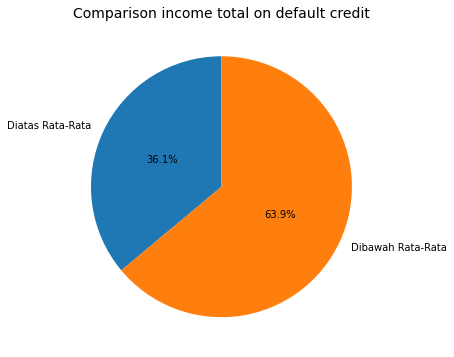

In [ ]:
df_income_all = dataset
df_default = dataset.loc[(dataset['TARGET'] == 1)].copy()
all_income_mean = df_income_all['AMT_INCOME_TOTAL'].mean()
df_default.loc[:, "AMT_INCOME_TYPE"] = df_default.apply(lambda row: "Dibawah Rata-Rata" if row['AMT_INCOME_TOTAL'] < all_income_mean else ("Rata-rata" if row['AMT_INCOME_TOTAL'] == all_income_mean  else "Diatas Rata-Rata"), axis=1)
data = df_default.groupby("AMT_INCOME_TYPE")['AMT_INCOME_TOTAL'].count()
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%",startangle=90, labels=labels, pctdistance=0.5)
plt.title("Comparison income total on default credit", fontsize=14);
data

In [ ]:
del  df_default, df_income_all, all_income_mean, data, pie, ax ,labels

##Nominal Pinjaman Sukses Diatas Rata Rata 

In [ ]:
df_success = dataset.loc[(dataset['TARGET'] == 0)].copy()
df_default = dataset.loc[(dataset['TARGET'] == 1)].copy()
df_default.loc[df_default['AMT_INCOME_TOTAL']>dataset['AMT_INCOME_TOTAL'].mean()].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8953.00,8956.00,8956.00,8956.00,8956.00,8956.00,3648.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,3902.00,8947.00,7304.00,4330.00,3600.00,4505.00,2938.00,2664.00,4100.00,4358.00,4413.00,2839.00,3558.00,2818.00,4366.00,2725.00,3891.00,4330.00,3600.00,4505.00,2938.00,2664.00,4100.00,4358.00,4413.00,2839.00,3558.00,2818.00,4366.00,2725.00,3891.00,4330.00,3600.00,4505.00,2938.00,2664.00,4100.00,4358.00,4413.00,2839.00,3558.00,2818.00,4366.00,2725.00,3891.00,4552.00,8946.00,8946.00,8946.00,8946.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,8956.00,7768.00,7768.00,7768.00,7768.00,7768.00,7768.00
mean,278359.19,1.00,0.46,255151.26,692427.23,32331.40,610220.05,0.02,-14976.17,27539.57,-4338.69,-2760.10,12.05,1.00,0.92,0.20,1.00,0.24,0.08,2.19,2.06,2.03,12.07,0.03,0.10,0.08,0.12,0.31,0.23,0.40,0.45,0.38,0.11,0.08,0.98,0.75,0.04,0.07,0.14,0.22,0.23,0.06,0.10,0.10,0.01,0.03,0.11,0.08,0.98,0.75,0.04,0.07,0.14,0.22,0.22,0.06,0.10,0.10,0.01,0.03,0.11,0.08,0.98,0.75,0.04,0.07,0.14,0.22,0.23,0.06,0.10,0.10,0.01,0.03,0.10,1.48,0.17,1.47,0.12,-886.01,0.00,0.78,0.00,0.01,0.04,0.00,0.12,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.04,0.28,0.27,2.19
std,101789.16,0.00,0.76,1237448.31,387803.31,13657.79,351810.08,0.01,3845.01,99719.14,3264.99,1514.74,11.46,0.00,0.27,0.40,0.04,0.43,0.27,0.95,0.53,0.53,3.36,0.17,0.30,0.27,0.32,0.46,0.42,0.21,0.21,0.20,0.11,0.08,0.06,0.12,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.07,0.12,0.08,0.13,0.10,0.15,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.12,0.08,0.13,0.10,0.15,0.16,0.08,0.10,0.11,0.05,0.07,0.11,2.33,0.49,2.31,0.40,790.31,0.01,0.42,0.00,0.12,0.19,0.00,0.33,0.07,0.00,0.05,0.00,0.05,0.05,0.03,0.09,0.00,0.07,0.02,0.02,0.02,0.09,0.10,0.21,0.83,0.67,2.01
min,100002.00,1.00,0.00,169200.00,45000.00,3870.00,45000.00,0.00,-25101.

## Apakah orang yg gagal bayar karena cicilan per tahunnya terlalu besar?

In [ ]:
from scipy import stats


a = dataset.loc[~dataset['TARGET'].isin([np.nan, np.isinf]) & ~dataset['AMT_ANNUITY'].isin([np.nan, np.isinf]), 'TARGET']
b = dataset.loc[~dataset['TARGET'].isin([np.nan, np.isinf]) & ~dataset['AMT_ANNUITY'].isin([np.nan, np.isinf]), 'AMT_ANNUITY']

stats.pointbiserialr(a, b)

PointbiserialrResult(correlation=-0.012816561515413652, pvalue=1.1826767819353554e-12)

In [ ]:
dataset[['TARGET', 'AMT_ANNUITY']].corr(method="pearson")

,TARGET,AMT_ANNUITY
TARGET,1.00,-0.01
AMT_ANNUITY,-0.01,1.00


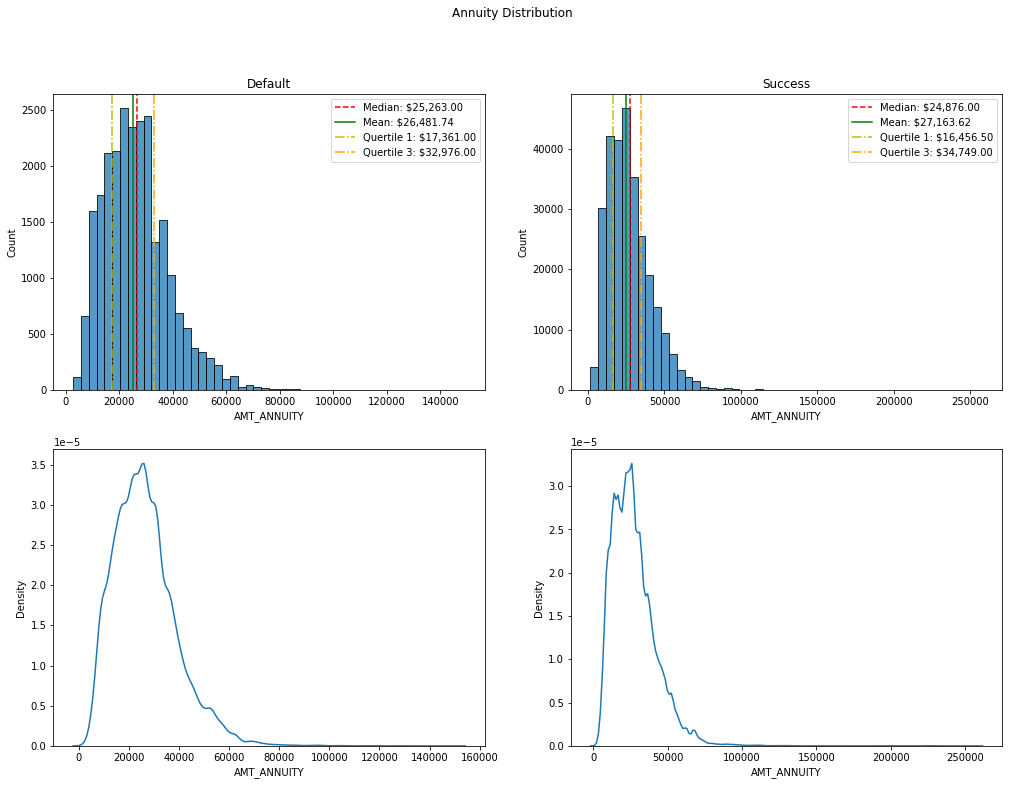

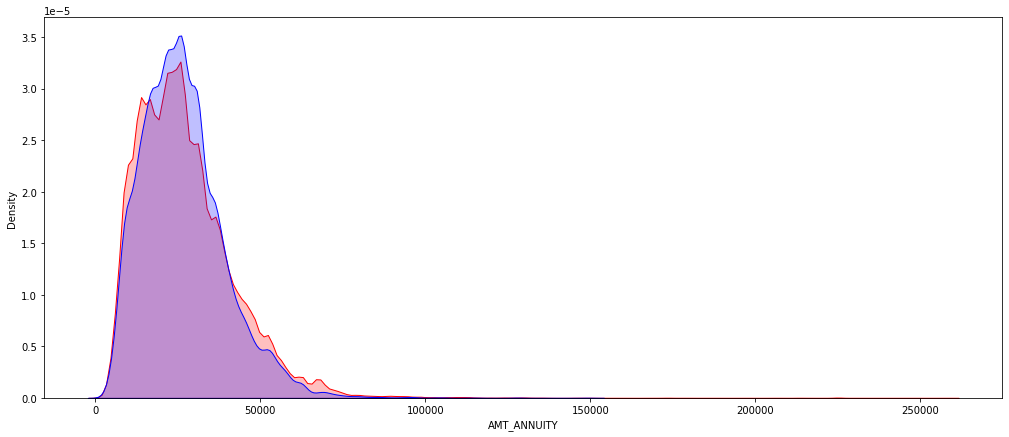

In [ ]:
df_annuity_def = dataset.loc[(dataset['TARGET'] == 1)]
df_annuity_suc = dataset.loc[(dataset['TARGET'] == 0) & ~np.isnan(dataset['AMT_ANNUITY'])]


annuity_def_mean = df_annuity_def['AMT_ANNUITY'].mean()
annuity_def_median = df_annuity_def['AMT_ANNUITY'].median()
annuity_def_mean_str = str("${:,.2f}".format(annuity_def_mean))
annuity_def_median_str = str("${:,.2f}".format(annuity_def_median))
annuity_def_q1 = np.quantile(df_annuity_def['AMT_ANNUITY'], 0.25, axis=0)
annuity_def_q3 = np.quantile(df_annuity_def['AMT_ANNUITY'], 0.75, axis=0)
annuity_def_q1_str = str("${:,.2f}".format(annuity_def_q1))
annuity_def_q3_str = str("${:,.2f}".format(annuity_def_q3))


annuity_suc_mean = df_annuity_suc['AMT_ANNUITY'].mean()
annuity_suc_median = df_annuity_suc['AMT_ANNUITY'].median()
annuity_suc_mean_str = str("${:,.2f}".format(annuity_suc_mean))
annuity_suc_median_str = str("${:,.2f}".format(annuity_suc_median))
annuity_suc_q1 = np.quantile(df_annuity_suc['AMT_ANNUITY'], 0.25, axis=0)
annuity_suc_q3 = np.quantile(df_annuity_suc['AMT_ANNUITY'], 0.75, axis=0)
annuity_suc_q1_str = str("${:,.2f}".format(annuity_suc_q1))
annuity_suc_q3_str = str("${:,.2f}".format(annuity_suc_q3))

fig, axes = plt.subplots(2, 2, figsize=(17,12))
fig.suptitle('Annuity Distribution')

axes[0,0].set_title("Default")
sns.histplot(df_annuity_def["AMT_ANNUITY"], ax=axes[0,0], bins=50)
axes[0,0].axvline(annuity_def_mean, color='r', linestyle='--')
axes[0,0].axvline(annuity_def_median, color='g', linestyle='-')
axes[0,0].axvline(annuity_def_q1, color='y', linestyle='-.')
axes[0,0].axvline(annuity_def_q3, color='orange', linestyle='-.',)
axes[0,0].legend({
                  'Median: '+annuity_def_median_str:annuity_def_median, 
                  'Mean: '+annuity_def_mean_str:annuity_def_mean,
                  "Quertile 1: "+annuity_def_q1_str: annuity_def_q1,
                  "Quertile 3: "+annuity_def_q3_str:annuity_def_q3,
                  })

sns.kdeplot(data=df_annuity_def, x="AMT_ANNUITY",ax=axes[1,0])

axes[0,1].set_title("Success")
sns.histplot(df_annuity_suc, x="AMT_ANNUITY",ax=axes[0,1], bins=50)
axes[0,1].axvline(annuity_suc_mean, color='r', linestyle='--')
axes[0,1].axvline(annuity_suc_median, color='g', linestyle='-')
axes[0,1].axvline(annuity_suc_q1, color='y', linestyle='-.')
axes[0,1].axvline(annuity_suc_q3, color='orange', linestyle='-.',)
axes[0,1].legend({
                    
                  'Median: '+annuity_suc_median_str:annuity_suc_median, 
                  'Mean: '+annuity_suc_mean_str:annuity_suc_mean,
                  "Quertile 1: "+annuity_suc_q1_str: annuity_suc_q1,
                  "Quertile 3: "+annuity_suc_q3_str:annuity_suc_q3,
                  })

sns.kdeplot(data=df_annuity_suc, x="AMT_ANNUITY",ax=axes[1,1])

plt.show()
plt.figure(figsize=(17.17,7))
sns.kdeplot(df_annuity_suc['AMT_ANNUITY'], color='r', shade=True, Label='Success')
sns.kdeplot(df_annuity_def['AMT_ANNUITY'], color='b', shade=True, Label='Default')
plt.show()


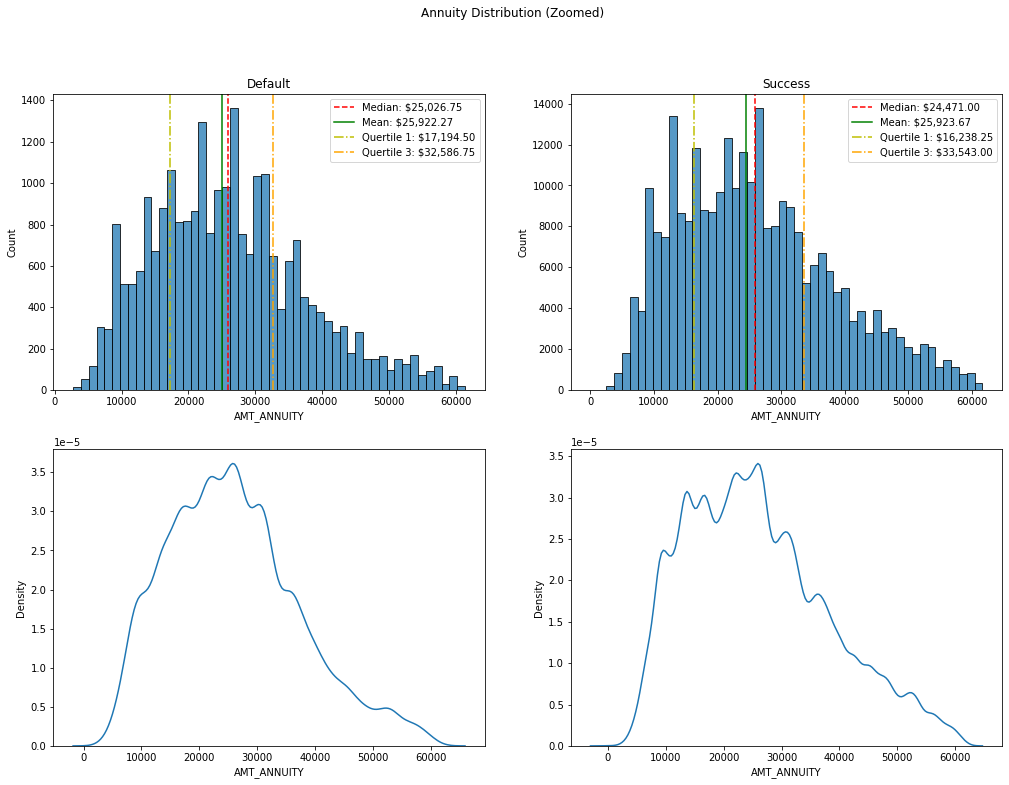

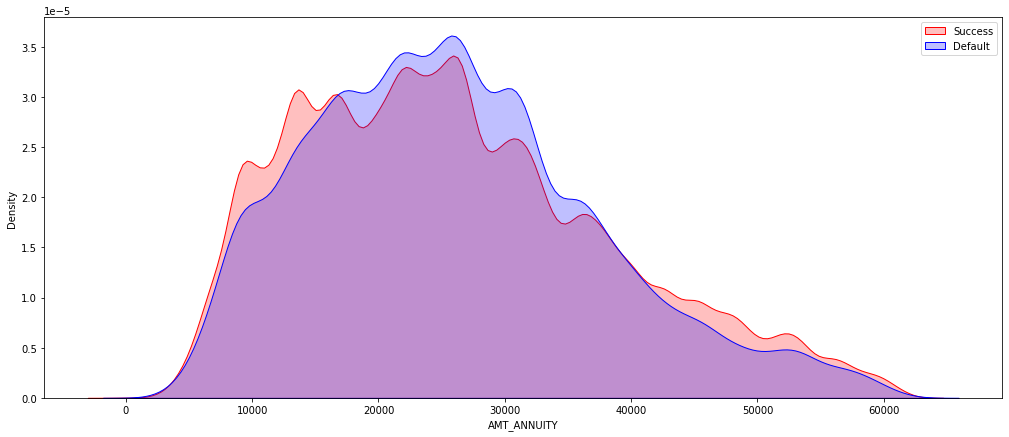

In [ ]:
#Remove oulier cicilan
dataset[['AMT_ANNUITY']]=dataset[['AMT_ANNUITY']].fillna(value=0)
q1 = np.quantile(dataset['AMT_ANNUITY'], 0.25, axis=0)
q3 = np.quantile(dataset['AMT_ANNUITY'], 0.75, axis=0)
# interquartile
iqr = (q3 - q1) * 1.5
#lower
lower = q1 - iqr
#upper
upper = q3 + iqr

# df_annuity = dataset.loc[(dataset['AMT_ANNUITY'] < upper) & (dataset['AMT_ANNUITY'] > lower)]
df_annuity_def = dataset.loc[(dataset['TARGET'] == 1) & (dataset['AMT_ANNUITY'] < upper) & (dataset['AMT_ANNUITY'] > lower)]
df_annuity_suc = dataset.loc[(dataset['TARGET'] == 0) & ~np.isnan(dataset['AMT_ANNUITY']) & (dataset['AMT_ANNUITY'] < upper) & (dataset['AMT_ANNUITY'] > lower)]


annuity_def_mean = df_annuity_def['AMT_ANNUITY'].mean()
annuity_def_median = df_annuity_def['AMT_ANNUITY'].median()
annuity_def_mean_str = str("${:,.2f}".format(annuity_def_mean))
annuity_def_median_str = str("${:,.2f}".format(annuity_def_median))
annuity_def_q1 = np.quantile(df_annuity_def['AMT_ANNUITY'], 0.25, axis=0)
annuity_def_q3 = np.quantile(df_annuity_def['AMT_ANNUITY'], 0.75, axis=0)
annuity_def_q1_str = str("${:,.2f}".format(annuity_def_q1))
annuity_def_q3_str = str("${:,.2f}".format(annuity_def_q3))


annuity_suc_mean = df_annuity_suc['AMT_ANNUITY'].mean()
annuity_suc_median = df_annuity_suc['AMT_ANNUITY'].median()
annuity_suc_mean_str = str("${:,.2f}".format(annuity_suc_mean))
annuity_suc_median_str = str("${:,.2f}".format(annuity_suc_median))
annuity_suc_q1 = np.quantile(df_annuity_suc['AMT_ANNUITY'], 0.25, axis=0)
annuity_suc_q3 = np.quantile(df_annuity_suc['AMT_ANNUITY'], 0.75, axis=0)
annuity_suc_q1_str = str("${:,.2f}".format(annuity_suc_q1))
annuity_suc_q3_str = str("${:,.2f}".format(annuity_suc_q3))

fig, axes = plt.subplots(2, 2, figsize=(17,12))
fig.suptitle('Annuity Distribution (Zoomed)')

axes[0,0].set_title("Default")
sns.histplot(df_annuity_def["AMT_ANNUITY"], ax=axes[0,0], bins=50)
axes[0,0].axvline(annuity_def_mean, color='r', linestyle='--')
axes[0,0].axvline(annuity_def_median, color='g', linestyle='-')
axes[0,0].axvline(annuity_def_q1, color='y', linestyle='-.')
axes[0,0].axvline(annuity_def_q3, color='orange', linestyle='-.',)
axes[0,0].legend({
                  'Median: '+annuity_def_median_str:annuity_def_median, 
                  'Mean: '+annuity_def_mean_str:annuity_def_mean,
                  "Quertile 1: "+annuity_def_q1_str: annuity_def_q1,
                  "Quertile 3: "+annuity_def_q3_str:annuity_def_q3,
                  })

sns.kdeplot(data=df_annuity_def, x="AMT_ANNUITY",ax=axes[1,0])

axes[0,1].set_title("Success")
sns.histplot(df_annuity_suc, x="AMT_ANNUITY",ax=axes[0,1], bins=50)
axes[0,1].axvline(annuity_suc_mean, color='r', linestyle='--')
axes[0,1].axvline(annuity_suc_median, color='g', linestyle='-')
axes[0,1].axvline(annuity_suc_q1, color='y', linestyle='-.')
axes[0,1].axvline(annuity_suc_q3, color='orange', linestyle='-.',)
axes[0,1].legend({
                    
                  'Median: '+annuity_suc_median_str:annuity_suc_median, 
                  'Mean: '+annuity_suc_mean_str:annuity_suc_mean,
                  "Quertile 1: "+annuity_suc_q1_str: annuity_suc_q1,
                  "Quertile 3: "+annuity_suc_q3_str:annuity_suc_q3,
                  })

sns.kdeplot(data=df_annuity_suc, x="AMT_ANNUITY",ax=axes[1,1])

plt.show()
plt.figure(figsize=(17.17,7))
sns.kdeplot(df_annuity_suc['AMT_ANNUITY'], color='r', shade=True, Label='Success')
sns.kdeplot(df_annuity_def['AMT_ANNUITY'], color='b', shade=True, Label='Default')
plt.legend()
plt.show()

del q1, q3, iqr, lower, df_annuity_def, df_annuity_suc, annuity_def_mean, annuity_def_median, annuity_def_mean_str, annuity_def_median_str, annuity_def_q1, annuity_def_q3, annuity_def_q1_str, annuity_def_q3_str, annuity_suc_mean, annuity_suc_median, annuity_suc_mean_str, annuity_suc_median_str, annuity_suc_q1, annuity_suc_q3, annuity_suc_q1_str, annuity_suc_q3_str, fig, axes

## Apakah orang yang gagal bayar karena belum bekerja?

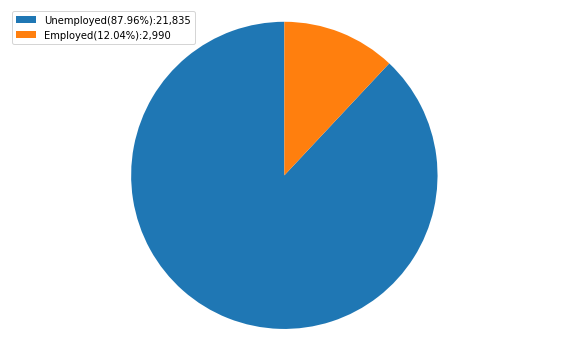

In [ ]:
count_unemployed = dataset.loc[(dataset['TARGET'] == 1) & (dataset['DAYS_EMPLOYED'] <= 0)].count()['SK_ID_CURR']
count_employed = dataset.loc[(dataset['TARGET'] == 1) & (dataset['DAYS_EMPLOYED'] > 0)].count()['SK_ID_CURR']
total_all = dataset.loc[(dataset['TARGET'] == 1)].count()['SK_ID_CURR']
data_pie = {
    "Type":['Unemployed', 'Employed'],
    "Percentage":[round(count_unemployed/total_all*100),round(count_employed/total_all*100)],
    "Count":[count_unemployed, count_employed]
}
df_pie = pd.DataFrame(data_pie)
labels=[
        "Unemployed"+"("+str("{:,.2f}".format(count_unemployed/total_all*100))+"%):" +"{:,.0f}".format(count_unemployed),
        "Employed"+"("+str("{:,.2f}".format(count_employed/total_all*100))+"%):"+"{:,.0f}".format(count_employed)
        ]
plt.figure(figsize=(8,5))
patches, texts = plt.pie(df_pie['Percentage'], startangle=90)
plt.legend(patches, labels, loc="best")

plt.axis('equal')
plt.tight_layout()
plt.show()

del data_pie, df_pie,patches, texts, total_all, count_unemployed, count_employed

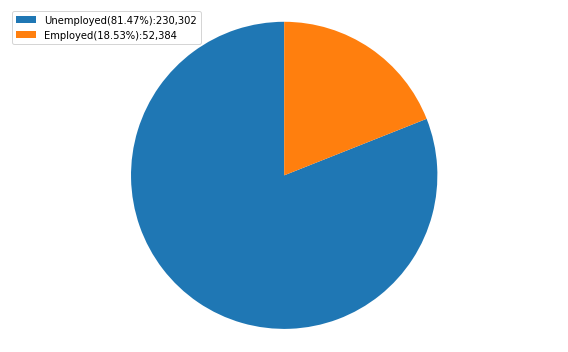

In [ ]:
count_unemployed = dataset.loc[(dataset['TARGET'] == 0) & (dataset['DAYS_EMPLOYED'] <= 0)].count()['SK_ID_CURR']
count_employed = dataset.loc[(dataset['TARGET'] == 0) & (dataset['DAYS_EMPLOYED'] > 0)].count()['SK_ID_CURR']
total_all = dataset.loc[(dataset['TARGET'] == 0)].count()['SK_ID_CURR']
data_pie = {
    "Type":['Unemployed', 'Employed'],
    "Percentage":[round(count_unemployed/total_all*100),round(count_employed/total_all*100)],
    "Count":[count_unemployed, count_employed]
}
df_pie = pd.DataFrame(data_pie)
labels=[
        "Unemployed"+"("+str("{:,.2f}".format(count_unemployed/total_all*100))+"%):" +"{:,.0f}".format(count_unemployed),
        "Employed"+"("+str("{:,.2f}".format(count_employed/total_all*100))+"%):"+"{:,.0f}".format(count_employed)
        ]
plt.figure(figsize=(8,5))
patches, texts = plt.pie(df_pie['Percentage'], startangle=90)
plt.legend(patches, labels, loc="best")

plt.axis('equal')
plt.tight_layout()
plt.show()

del data_pie, df_pie,patches, texts, total_all, count_unemployed, count_employed

# print(dataset.loc[(dataset['TARGET'] == 0) & (dataset['DAYS_EMPLOYED'] > 0)].count()['SK_ID_CURR'])

## Apakah orang yang gagal bayar terdapat orang-orang di lingkungannya yang memiliki pinjaman aktif?

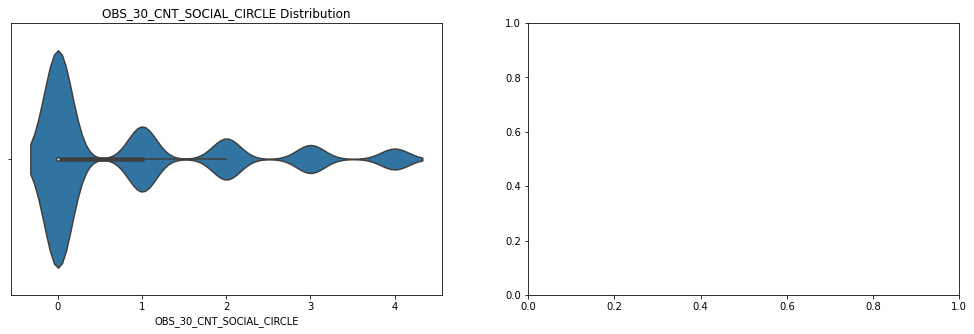

In [ ]:
df_default.head()

df_default_obs = df_default.copy()

df_default_obs.loc[:, 'OBS_30_CNT_SOCIAL_CIRCLE'] = df_default_obs.apply(lambda row: 0 if np.isnan(row['OBS_30_CNT_SOCIAL_CIRCLE']) else row['OBS_30_CNT_SOCIAL_CIRCLE'], axis=1)
df_default_obs.loc[:, 'OBS_60_CNT_SOCIAL_CIRCLE'] = df_default_obs.apply(lambda row: 0 if np.isnan(row['OBS_60_CNT_SOCIAL_CIRCLE']) else row['OBS_60_CNT_SOCIAL_CIRCLE'], axis=1)
q1 = np.quantile(df_default_obs['OBS_30_CNT_SOCIAL_CIRCLE'], 0.25, axis=0)
q3 = np.quantile(df_default_obs['OBS_30_CNT_SOCIAL_CIRCLE'], 0.75, axis=0)
iqr = (q3 - q1) * 1.5
lower = q1 - iqr
upper = q3 + iqr
df_default_obs_30 = df_default_obs.loc[(df_default_obs['OBS_30_CNT_SOCIAL_CIRCLE'] > lower) & (df_default_obs['OBS_30_CNT_SOCIAL_CIRCLE'] < upper)]

fig, axes = plt.subplots(1, 2, figsize=(17,5))
axes[0].set_title('OBS_30_CNT_SOCIAL_CIRCLE Distribution')
sns.violinplot(data=df_default_obs_30, x='OBS_30_CNT_SOCIAL_CIRCLE',ax=axes[0])



In [ ]:

q1 = np.quantile(df_default_obs['OBS_60_CNT_SOCIAL_CIRCLE'], 0.25, axis=0)
q3 = np.quantile(df_default_obs['OBS_60_CNT_SOCIAL_CIRCLE'], 0.75, axis=0)
iqr = (q3 - q1) * 1.5
lower = q1 - iqr
upper = q3 + iqr
df_default_obs_60 = df_default_obs.loc[(df_default_obs['OBS_60_CNT_SOCIAL_CIRCLE'] > lower) & (df_default_obs['OBS_60_CNT_SOCIAL_CIRCLE'] < upper)]
axes[1].set_title('OBS_60_CNT_SOCIAL_CIRCLE Distribution')
sns.violinplot(data=df_default_obs_60, x='OBS_60_CNT_SOCIAL_CIRCLE',ax=axes[1])
plt.show()

del df_default_obs, df_default_obs_30, df_default_obs_60

## Bagaimana korelasi antar data numerik?

In [ ]:
#data_cols

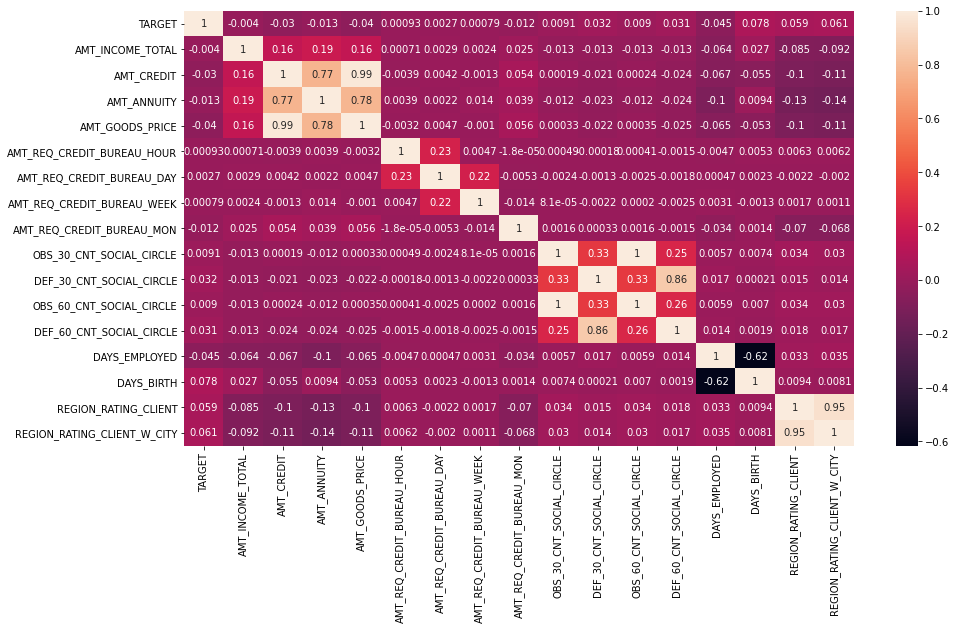

In [ ]:
plt.figure(figsize=(15,8))
data_corr = dataset[
                ['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_EMPLOYED','DAYS_BIRTH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']
            ].corr(method="pearson")

sns.heatmap(data_corr, annot=True)
plt.show()

## Apakah korelasi antara status pernikahan dengan gagal/sukses bayar pinjaman?


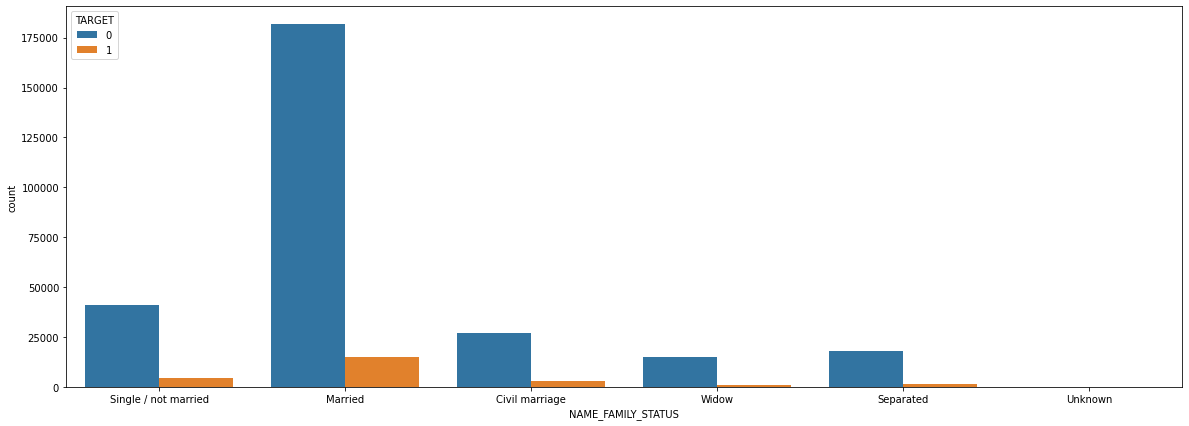

In [ ]:
#Notes status urutanya harus disamakan
plt.figure(figsize=(20,7))
sns.countplot(data=dataset, hue="TARGET", x="NAME_FAMILY_STATUS")

plt.show()

##Apakah rating wilayah provinsi maupun kota mempengaruhi gagal/sukses bayar?

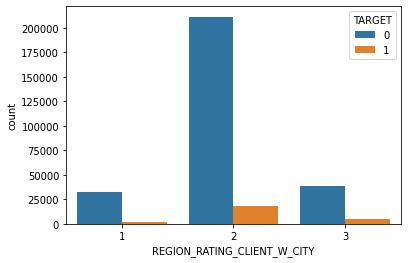

In [ ]:

sns.countplot(data=dataset, hue="TARGET", x="REGION_RATING_CLIENT_W_CITY")
plt.show()

#Bisa dilihat pada chart dibawah  gagal dan sukses bayar terdistibusi rata pada setiap rating wilayah sehingga tidak ada hubungan antara
#rating provinsi mau pun kota terhadap  dan gagal/sukses bayar

## Bagaimana persebaran jenis pekerjaan klien tiap pinjaman

In [ ]:
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,nan,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,nan,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,nan,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.56,0.73,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

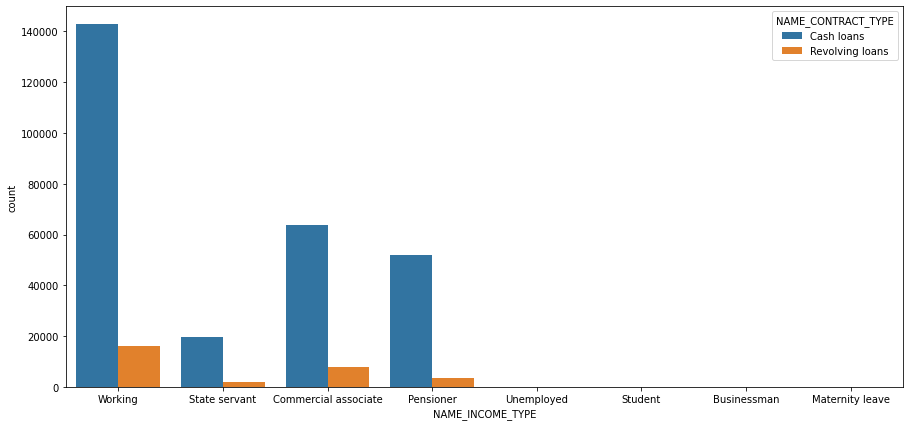

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=dataset, hue="NAME_CONTRACT_TYPE", x="NAME_INCOME_TYPE")
plt.show()


##Bagaimana korelasi antara penilaian ext_source dengan gagal/sukses bayarnya suatu pinjaman?

In [ ]:
# Korelasi
dataset[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].corr(method="pearson")

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.00,-0.16,-0.16,-0.18
EXT_SOURCE_1,-0.16,1.00,0.21,0.19
EXT_SOURCE_2,-0.16,0.21,1.00,0.11
EXT_SOURCE_3,-0.18,0.19,0.11,1.00


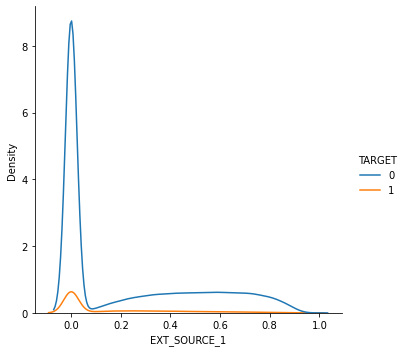

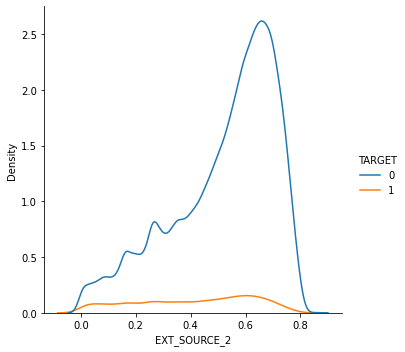

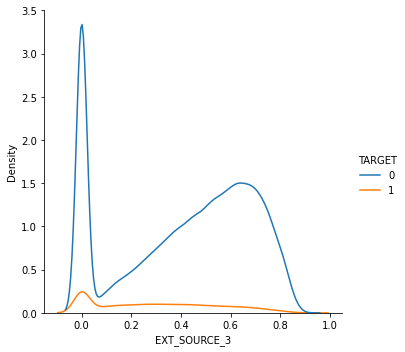

In [ ]:
# Distribusi
df_ext = dataset.copy()

df_ext.loc[:, 'EXT_SOURCE_1'] = df_ext.apply(lambda row: 0 if np.isnan(row['EXT_SOURCE_1']) else row['EXT_SOURCE_1'], axis=1)
df_ext.loc[:, 'EXT_SOURCE_2'] = df_ext.apply(lambda row: 0 if np.isnan(row['EXT_SOURCE_2']) else row['EXT_SOURCE_2'], axis=1)
df_ext.loc[:, 'EXT_SOURCE_3'] = df_ext.apply(lambda row: 0 if np.isnan(row['EXT_SOURCE_3']) else row['EXT_SOURCE_3'], axis=1)
sns.displot(df_ext, x="EXT_SOURCE_1", hue="TARGET", kind="kde")
sns.displot(df_ext, x="EXT_SOURCE_2", hue="TARGET", kind="kde")
sns.displot(df_ext, x="EXT_SOURCE_3", hue="TARGET", kind="kde")

#Berdasarkan distribusi data dan korelasi tidak ada hubungan antara penilauan ext source dan gagal/sukses bayar
del df_ext

## Bagaimana persebaran organisasi setiap pinjaman







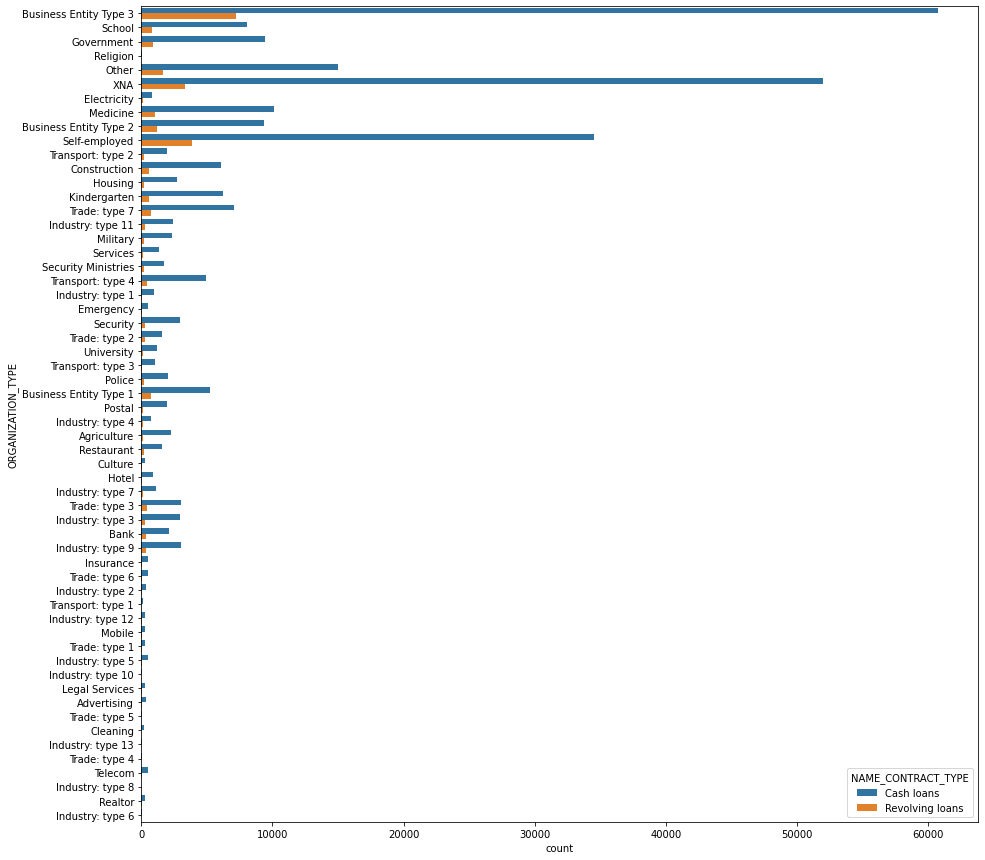

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(data=dataset, y='ORGANIZATION_TYPE',hue='NAME_CONTRACT_TYPE',orient="H")
plt.show()

##Apakah jenis organisasi memengaruhi gagal bayar?


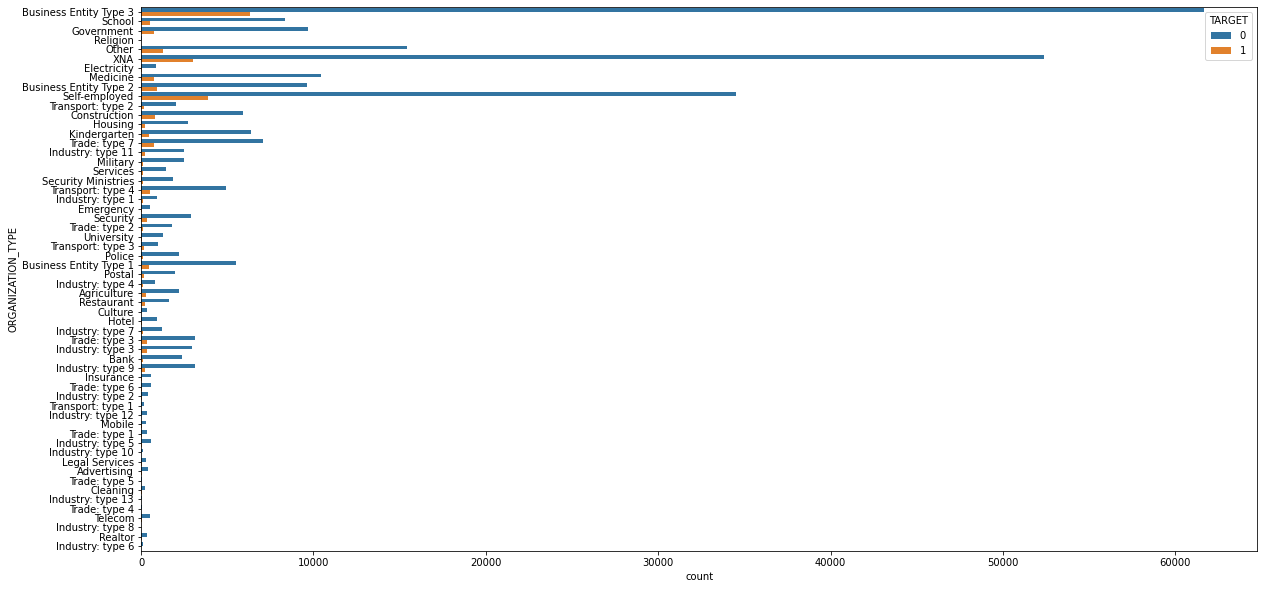

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=dataset, y='ORGANIZATION_TYPE',hue='TARGET')
plt.show()

#Jenis organisasi berpengaruh pada sukses/gagal bayarnya suatu pinjaman


## Apakah Tipe Rumah mempengaruhi gagal bayar

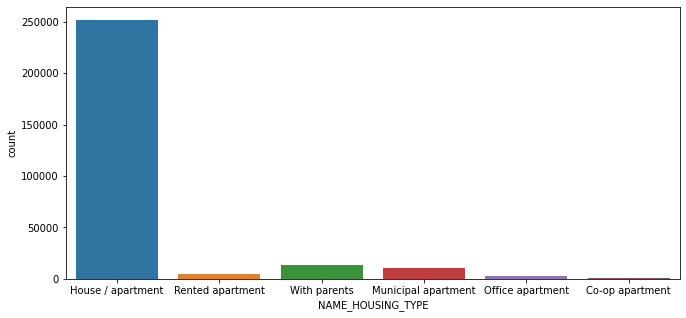

In [ ]:
plt.figure(figsize=(11,5))
sns.countplot(data=dataset.loc[dataset.TARGET == 0], x='NAME_HOUSING_TYPE')
# plt.legend()
plt.show()

<Figure size 1080x648 with 0 Axes>

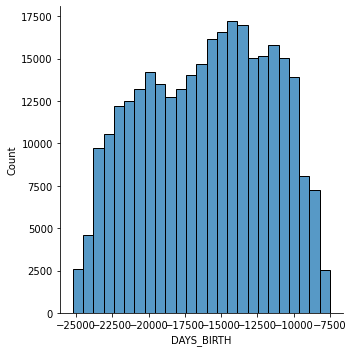

In [ ]:
plt.figure(figsize=(15, 9))
sns.displot(data=dataset, x="DAYS_BIRTH", bins=25)
plt.show()

# Pre-processing

In [ ]:
df=dataset.copy()

##Hapus Outliers

reading source: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [ ]:
def remove_outliers(df, numeric_cols):
    """
    To remove outliers on column with numerical data type.
    Parameters:
    df: Dataset
    numeric_cols: List of numerical columns name
    """
    for col in numeric_cols:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        # Using OR because outliers sometime below lower or above upper or both   
        df[col] = df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]
    return df

In [ ]:
cols_num_only = df.select_dtypes(include=np.number).columns.tolist()
del cols_num_only[0:2]  

In [ ]:
# df = remove_outliers(df, cols_num_only)
df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

## Handle Null and Duplicate Values

In [ ]:
def checknull(df):
    """
    Check null values
    Parameters:
    df: Dataset
    """
    datatype = pd.DataFrame(df.dtypes).reset_index()
    datatype.columns=["column", "type"]
    datanull = pd.DataFrame(df.isnull().sum()).reset_index()
    datanull.columns=["column", "total"]
    dataMerge = pd.merge(datatype, datanull, on="column")
    return dataMerge.loc[dataMerge['total'] > 0]

In [ ]:
print(checknull(df).shape)
checknull(df)

(67, 3)


,column,type,total
9,AMT_ANNUITY,float64,12
10,AMT_GOODS_PRICE,float64,278
11,NAME_TYPE_SUITE,object,1292
21,OWN_CAR_AGE,float64,202929
28,OCCUPATION_TYPE,object,96391
...,...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,float64,41519
118,AMT_REQ_CREDIT_BUREAU_WEEK,float64,41519
119,AMT_REQ_CREDIT_BUREAU_MON,float64,41519
120,AMT_REQ_CREDIT_BUREAU_QRT,float64,41519


In [ ]:
def drop_null_cols(df, percentage=55):
    """
    Drop column(s) with null values
    Parameters:
    df: Dataset (Dataframe)
    percentage: Percentage of null values on the columns(int/float)
    """
    #Get null column
    cols_null = pd.DataFrame(df.isnull().sum())
    cols_null = cols_null.reset_index().rename(columns={'index': 'Title', 0: 'Total'})
    cols_null.loc[:, 'Percentage'] = cols_null.apply(lambda row: row['Total']/df.shape[0] * 100, axis=1)
    print("before drop null columns: ",df.shape)
    null_columns= cols_null[cols_null['Percentage'] > percentage].Title
    # drop column
    df=df.drop(null_columns,axis=1)
    print(f"after drop null columns (above {percentage}% of null values): ",df.shape)
    return df, null_columns


df, dropped_cols = drop_null_cols(df)

df.head()

before drop null columns:  (307511, 122)
after drop null columns (above 55% of null values):  (307511, 95)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0247,0.9722,0.00,0.0690,0.0833,0.0190,0.0252,0.9722,0.0000,0.0690,0.0833,0.0198,0.0250,0.9722,0.00,0.0690,0.0833,0.0193,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.0959,0.9851,0.08,0.0345,0.2917,0.0549,0.0924,0.9851,0.0806,0.0345,0.2917,0.0554,0.0968,0.9851,0.08,0.0345,0.2917,0.0558,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.

In [ ]:
# cols_null.sort_values("Percentage", ascending=False)
checknull(df)

,column,type,total
9,AMT_ANNUITY,float64,12
10,AMT_GOODS_PRICE,float64,278
11,NAME_TYPE_SUITE,object,1292
27,OCCUPATION_TYPE,object,96391
28,CNT_FAM_MEMBERS,float64,2
40,EXT_SOURCE_2,float64,660
41,EXT_SOURCE_3,float64,60965
42,APARTMENTS_AVG,float64,156061
43,YEARS_BEGINEXPLUATATION_AVG,float64,150007
44,ELEVATORS_AVG,float64,163891


In [ ]:
#fillna
def fill_nulls(df):
    """
    Fill null columns
    Parameters:
    df: Dataset
    """
    dataMerge = checknull(df)
    newVal = {}
    for col in dataMerge.loc[dataMerge['total'] > 0]['column']:
        if (df[col].dtypes == "object"):
            newVal[col] = df[col].mode()[0]
        else:
            newVal[col] = df[col].median()

    df.fillna(value=newVal, inplace=True)
    return df

df = fill_nulls(df)


In [ ]:
print(checknull(df).shape)
checknull(df)

(0, 3)


,column,type,total


In [ ]:
df['CNT_FAM_MEMBERS'].value_counts()

2.0     158359
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [ ]:
df.loc[:, 'CNT_FAM_MEMBERS'] = df.apply(lambda row: round(row['CNT_FAM_MEMBERS']), axis=1)
print(df.shape)

(307511, 95)


In [ ]:
#Remove Duplicate
#Tidak Ada Duplikasi

## Feature Enginering

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0247,0.9722,0.00,0.0690,0.0833,0.0190,0.0252,0.9722,0.0000,0.0690,0.0833,0.0198,0.0250,0.9722,0.00,0.0690,0.0833,0.0193,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.0959,0.9851,0.08,0.0345,0.2917,0.0549,0.0924,0.9851,0.0806,0.0345,0.2917,0.0554,0.0968,0.9851,0.08,0.0345,0.2917,0.0558,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0876,0.9816,0.00,0.1379,0.1667,0.0745,0.0840,0.9816,0.0000,0.1379,0.1667,0.0731,0.0864,0.9816,0.00,0.1379,0.1667,0.0749,block of flats,0.0688,Panel,No,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,0.0876,0.9816,0.00,0.1379,0.1667,0.0745,0.0840,0.9816,0.0000,0.1379,0.1667,0.0731,0.0864,0.9816,0.00,0.1379,0.1667,0.0749,block of flats,0.0688,Panel,No,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1,2,2,THURSD

In [ ]:
## EXT SOURCE
def ext_source_cols(df):
    """
    Feature engineering on EXT SOURCE columns
    Parameters
    df: Dataset
    """
    df['EXT_SOURCE_1'] = dataset['EXT_SOURCE_1']
    df['EXT_SOURCE_1'].fillna(0, inplace=True)
    df["EXT_SOURCE_MEAN"] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)
    df["EXT_SOURCE_STD"] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3']].std(axis=1)
    df.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3'],axis=1, inplace=True)

    return df

df = ext_source_cols(df)
# df['EXT_SOURCE_1'] = dataset['EXT_SOURCE_1']
# df['EXT_SOURCE_1'].fillna(0, inplace=True)
# df["EXT_SOURCE_MEAN"] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)
# df["EXT_SOURCE_STD"] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3']].std(axis=1)
# df.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3'],axis=1, inplace=True)


In [ ]:
def classified_age(days_birth):
    """ Return the age group label (int). """
    age_years = np.abs(days_birth / 365)
    if age_years < 27: return 1
    elif age_years < 40: return 2
    elif age_years < 50: return 3
    elif age_years < 65: return 4
    elif age_years < 99: return 5
    else: return 0



In [ ]:
df.loc[:, "DAYS_BIRTH"] = df.apply(lambda row: classified_age(row['DAYS_BIRTH']), axis=1)

In [ ]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_MEAN,EXT_SOURCE_STD
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,2.881673,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.102297,0.979620,0.036869,0.143771,0.196633,0.090886,0.098889,0.979277,0.034790,0.141521,0.194641,0.089474,0.101889,0.979629,0.036465,0.143517,0.196440,0.091688,0.086258,1.417523,0.142944,1.400626,0.099717,-962.858119,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,0.416407,0.251339
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,1.009959,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.077412,0.042429,0.100048,0.070746,0.106761,0.079745,0.077241,0.046270,0.097726,0.071245,0.105588,0.080627,0.078146,0.042910,0.099810,0.070949,0.106998,0.080999,0.079110,2.398395,0.446033,2.377224,0.361735,826.807226,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,

## Remove Kolom Yang Irelevan

In [ ]:

                         
irrelevant_columns=['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START',
                    'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
                    'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                    'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                    'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                    'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                    'WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE'
                    ]
                    # 
df=df.drop(irrelevant_columns,axis=1)
df.shape


(307511, 71)

## Encoding

In [ ]:
df_all = df.copy()

In [ ]:
df_all.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_MEAN,EXT_SOURCE_STD
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1,2,2,10,0,0,0,0,0,0,Business Entity Type 3,0.0247,0.9722,0.00,0.0690,0.0833,0.0190,0.0252,0.9722,0.0000,0.0690,0.0833,0.0198,0.0250,0.9722,0.00,0.0690,0.0833,0.0193,block of flats,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,0.092026
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,3,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2,1,1,11,0,0,0,0,0,0,School,0.0959,0.9851,0.08,0.0345,0.2917,0.0549,0.0924,0.9851,0.0806,0.0345,0.2917,0.0554,0.0968,0.9851,0.08,0.0345,0.2917,0.0558,block of flats,0.0714,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.489596,0.160443
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1,2,2,9,0,0,0,0,0,0,Government,0.0876,0.9816,0.00,0.1379,0.1667,0.0745,0.0840,0.9816,0.0000,0.1379,0.1667,0.0731,0.0864,0.9816,0.00,0.1379,0.1667,0.0749,block of flats,0.0688,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428493,0.381108
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,4,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2,2,2,17,0,0,0,0,0,0,Business Entity Type 3,0.0876,0.9816,0.00,0.1379,0.1667,0.0745,0.0840,0.9816,0.0000,0.1379,0.1667,0.0731,0.0864,0.9816,0.00,0.1379,0.1667,0.0749,block of flats,0.0688,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,0.395239,0.347097
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1,2,2,11,0,0,0,0,1,1,Religion,0.0876,0.9816,0.00,0.1379,0.1667,0.0745,0.0840,0.9816,0.0000,0.1379,0.1667,0.0731,0.0864,0.9816,0.00,0.1379,0.1667,0.0749,block of flats,0.0688,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.286005,0.269522


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

def encode_ordinal_col(df, col_name, label):
    """
    Encode column with ordinal values
    Parameters
    df: Dataset
    col_name: Column's name
    label: label of column value (list). ex: [['Academic degree',5],['Higher education',4],['Incomplete higher',3],['Secondary / secondary special',2],['Lower secondary',1]]
    """
    encoder = OrdinalEncoder()
    encoder.fit(label)
    df.loc[:, col_name] = encoder.fit_transform(df[[col_name]])
    return df, encoder

label = [['Academic degree',5],['Higher education',4],['Incomplete higher',3],['Secondary / secondary special',2],['Lower secondary',1]]
df_all,encoder = encode_ordinal_col(df_all, "NAME_EDUCATION_TYPE", label)
# encoder = OrdinalEncoder()
# label = [['Academic degree',5],['Higher education',4],['Incomplete higher',3],['Secondary / secondary special',2],['Lower secondary',1]]
# encoder.fit(label)
# # ordinals = pd.DataFrame(encoder.fit_transform(df_all[["NAME_EDUCATION_TYPE"]]),columns = ["NAME_EDUCATION_TYPE"])
# df_all.loc[:, 'NAME_EDUCATION_TYPE'] = encoder.fit_transform(df[["NAME_EDUCATION_TYPE"]])

In [ ]:
df_all[["NAME_EDUCATION_TYPE"]].head()

,NAME_EDUCATION_TYPE
0,4.0
1,1.0
2,4.0
3,4.0
4,4.0


In [ ]:
encoder.inverse_transform(df_all[['NAME_EDUCATION_TYPE']])

array([['Secondary / secondary special'],
       ['Higher education'],
       ['Secondary / secondary special'],
       ...,
       ['Higher education'],
       ['Secondary / secondary special'],
       ['Higher education']], dtype=object)

In [ ]:
checknull(df_all)

,column,type,total


In [ ]:
df_all.head()


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_MEAN,EXT_SOURCE_STD
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,4.0,Single / not married,House / apartment,0.018801,1,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1,2,2,10,0,0,0,0,0,0,Business Entity Type 3,0.0247,0.9722,0.00,0.0690,0.0833,0.0190,0.0252,0.9722,0.0000,0.0690,0.0833,0.0198,0.0250,0.9722,0.00,0.0690,0.0833,0.0193,block of flats,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,0.092026
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,1.0,Married,House / apartment,0.003541,3,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2,1,1,11,0,0,0,0,0,0,School,0.0959,0.9851,0.08,0.0345,0.2917,0.0549,0.0924,0.9851,0.0806,0.0345,0.2917,0.0554,0.0968,0.9851,0.08,0.0345,0.2917,0.0558,block of flats,0.0714,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.489596,0.160443
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,4.0,Single / not married,House / apartment,0.010032,4,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1,2,2,9,0,0,0,0,0,0,Government,0.0876,0.9816,0.00,0.1379,0.1667,0.0745,0.0840,0.9816,0.0000,0.1379,0.1667,0.0731,0.0864,0.9816,0.00,0.1379,0.1667,0.0749,block of flats,0.0688,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428493,0.381108
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,4.0,Civil marriage,House / apartment,0.008019,4,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2,2,2,17,0,0,0,0,0,0,Business Entity Type 3,0.0876,0.9816,0.00,0.1379,0.1667,0.0745,0.0840,0.9816,0.0000,0.1379,0.1667,0.0731,0.0864,0.9816,0.00,0.1379,0.1667,0.0749,block of flats,0.0688,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,0.395239,0.347097
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,4.0,Single / not married,House / apartment,0.028663,4,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1,2,2,11,0,0,0,0,1,1,Religion,0.0876,0.9816,0.00,0.1379,0.1667,0.0745,0.0840,0.9816,0.0000,0.1379,0.1667,0.0731,0.0864,0.9816,0.00,0.1379,0.1667,0.0749,block of flats,0.0688,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.286005,0.269522


In [ ]:
# #One Hot Encoding

# categorical_feature=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
#                      'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','ORGANIZATION_TYPE',]#HOUSETYPE_MODE, 'OCCUPATION_TYPE'

# onehots=pd.DataFrame(df_all['TARGET'])
# for cat in categorical_feature:
#     onehots = onehots.join(pd.get_dummies(df_all[cat],prefix=cat))

# df_all.drop(categorical_feature, 1, inplace=True)
# df_all = df_all.join(onehots.drop('TARGET', 1))

# new encode
# data=df[["NAME_INCOME_TYPE", 'TARGET']].groupby(["NAME_INCOME_TYPE"],as_index=False).mean()
# data

def encode_cat_cols(df, target_name, suffix="_ENCODED"):
    """
    Encode categorical columns using bayesian probability between feature and target value
    Parameters:
    df: Dataset
    target_name: Target column's name
    suffix: Suffix for new column
    """
    data_encoded = pd.DataFrame()
    for obj_col in df.select_dtypes(include=['object']).columns:
        data = df[[obj_col, target_name]].groupby([obj_col],as_index=False).mean()
        data.columns = [obj_col, f'{obj_col}{suffix}']

        temp = data.copy()
        temp.loc[:, "columns_name"] = obj_col
        temp["real_values"] = data[obj_col]
        temp["encoded_values"] = data[f'{obj_col}{suffix}']
        temp.drop([obj_col, f'{obj_col}{suffix}'], axis=1, inplace=True)

        if data_encoded.empty:
            data_encoded = temp
        else:
            data_encoded = pd.concat([data_encoded, temp])
        df = pd.merge(df, data, on=obj_col, how="left")
        df.drop(obj_col, axis=1, inplace=True)
        del temp

    return df, data_encoded

# for obj_col in df_all.select_dtypes(include=['object']).columns:
#     data = df_all[[obj_col, 'TARGET']].groupby([obj_col],as_index=False).mean()
#     data.columns = [obj_col, f'{obj_col}_ENCODED']
#     df_all = pd.merge(df_all, data, on=obj_col, how="left")
#     df_all.drop(obj_col, axis=1, inplace=True)

df_all, data_encoded = encode_cat_cols(df_all, "TARGET")
df_all.head()


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_MEAN,EXT_SOURCE_STD,NAME_CONTRACT_TYPE_ENCODED,CODE_GENDER_ENCODED,FLAG_OWN_CAR_ENCODED,FLAG_OWN_REALTY_ENCODED,NAME_TYPE_SUITE_ENCODED,NAME_INCOME_TYPE_ENCODED,NAME_FAMILY_STATUS_ENCODED,NAME_HOUSING_TYPE_ENCODED,OCCUPATION_TYPE_ENCODED,ORGANIZATION_TYPE_ENCODED,HOUSETYPE_MODE_ENCODED
0,1,0,202500.0,406597.5,24700.5,351000.0,4.0,0.018801,1,-637,-3648.0,-2120,1,1,0,1,1,0,1,2,2,10,0,0,0,0,0,0,0.0247,0.9722,0.00,0.0690,0.0833,0.0190,0.0252,0.9722,0.0000,0.0690,0.0833,0.0198,0.0250,0.9722,0.00,0.0690,0.0833,0.0193,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,0.092026,0.083459,0.101419,0.085002,0.079616,0.081687,0.095885,0.098077,0.077957,0.079933,0.092996,0.08061
1,0,0,270000.0,1293502.5,35698.5,1129500.0,1.0,0.003541,3,-1188,-1186.0,-291,1,1,0,1,1,0,2,1,1,11,0,0,0,0,0,0,0.0959,0.9851,0.08,0.0345,0.2917,0.0549,0.0924,0.9851,0.0806,0.0345,0.2917,0.0554,0.0968,0.9851,0.08,0.0345,0.2917,0.0558,0.0714,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.489596,0.160443,0.083459,0.069993,0.085002,0.083249,0.074946,0.057550,0.075599,0.077957,0.063040,0.059148,0.08061
2,0,0,67500.0,135000.0,6750.0,135000.0,4.0,0.010032,4,-225,-4260.0,-2531,1,1,1,1,1,0,1,2,2,9,0,0,0,0,0,0,0.0876,0.9816,0.00,0.1379,0.1667,0.0745,0.0840,0.9816,0.0000,0.1379,0.1667,0.0731,0.0864,0.9816,0.00,0.1379,0.1667,0.0749,0.0688,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428493,0.381108,0.054783,0.101419,0.072437,0.079616,0.081687,0.095885,0.098077,0.077957,0.079933,0.069781,0.08061
3,0,0,135000.0,312682.5,29686.5,297000.0,4.0,0.008019,4,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,2,17,0,0,0,0,0,0,0.0876,0.9816,0.00,0.1379,0.1667,0.0745,0.0840,0.9816,0.0000,0.1379,0.1667,0.0731,0.0864,0.9816,0.00,0.1379,0.1667,0.0749,0.0688,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,0.395239,0.347097,0.083459,0.069993,0.085002,0.079616,0.081687,0.095885,0.099446,0.077957,0.079933,0.092996,0.08061
4,0,0,121500.0,513000.0,21865.5,513000.0,4.0,0.028663,4,-3038,-4311.0,-3458,1,1,0,1,0,0,1,2,2,11,0,0,0,0,1,1,0.0876,0.9816,0.00,0.1379,0.1667,0.0745,0.0840,0.9816,0.0000,0.1379,0.1667,0.0731,0.0864,0.9816,0.00,0.1379,0.1667,0.0749,0.0688,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.286005,0.269522,0.083459,0.101419,0.085002,0.079616,0.081687,0.095885,0.098077,0.077957,0.063040,0.058824,0.08061


In [ ]:
data_encoded.head()

,columns_name,real_values,encoded_values
0,NAME_CONTRACT_TYPE,Cash loans,0.083459
1,NAME_CONTRACT_TYPE,Revolving loans,0.054783
0,CODE_GENDER,F,0.069993
1,CODE_GENDER,M,0.101419
2,CODE_GENDER,XNA,0.000000


In [ ]:
df.shape

(307511, 71)

In [ ]:

df_all.shape

(307511, 71)

## Handling Multicolinearity (Not necessery)




In [ ]:
#Cek Multikolinearitas
# multicolinearity= pd.DataFrame(df_all.corr(method='pearson').abs().unstack().sort_values(ascending=False)).reset_index()


In [ ]:
# multicolinearity[(multicolinearity[0]<1) & (multicolinearity[0]>0.7)].iloc[::2].level_0.value_counts()

In [ ]:
# Hapus Multicolinearity
# columns=['NAME_INCOME_TYPE_1','NAME_TYPE_SUITE_3','WALLSMATERIAL_MODE_2','NAME_HOUSING_TYPE_2','HOUSETYPE_MODE_1']
# data_encoded=data_encoded.drop(columns,axis=1)
# multicolinearity= pd.DataFrame(data_encoded.corr(method='pearson').abs().unstack().sort_values(ascending=False)).reset_index()
# multicolinearity[multicolinearity[0]<1].head(20)

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
cols_num_only = df.select_dtypes(include=np.number).columns.tolist()
df_num_only = df[cols_num_only]

X_num = df_num_only.drop(["TARGET"],1)
y_num = df_num_only['TARGET']
X = df_all.drop(["TARGET"],1)
y = df_all['TARGET']

cols_all = X.columns

### num only

In [ ]:
scaler = StandardScaler()
scaler.fit(X_num)
X_num_scalled = scaler.transform(X_num)

In [ ]:
pd.DataFrame(X_num_scalled, columns=cols_num_only[1:]).head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_MEAN,EXT_SOURCE_STD
0,-0.577538,0.142129,-0.478095,-0.166143,-0.507236,-0.149452,-1.863121,-0.456215,0.379837,0.579154,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-1.265722,-0.103064,-0.062699,-0.631821,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-1.002379,-0.174890,-0.368513,-1.056903,-1.061562,-0.901454,-0.954015,-0.152958,-0.355991,-1.017906,-1.054484,-0.864156,-0.983920,-0.173135,-0.365348,-1.050292,-1.057404,-0.893694,-0.902008,0.242861,4.163504,0.252132,5.253260,-0.206992,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.440926,-1.868449,-1.431004
1,-0.577538,0.426792,1.725450,0.592683,1.600873,-1.252750,0.117161,-0.460115,1.078697,1.790855,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-0.167638,-2.067573,-2.051813,-0.325620,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.082629,0.129151,0.431106,-1.544566,0.890461,-0.451266,-0.084008,0.125838,0.468762,-1.502149,0.919231,-0.422615,-0.065124,0.127494,0.436172,-1.536558,0.890300,-0.443071,-0.187810,-0.174085,-0.320480,-0.168527,-0.275663,0.163107,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331,0.537075,-0.816461
2,-0.577538,-0.427196,-1.152888,-1.404669,-1.092145,-0.783451,1.107302,-0.453299,0.206116,0.306869,0.001803,0.468697,2.003956,0.043245,1.599337,-0.245215,-1.265722,-0.103064,-0.062699,-0.938022,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.189847,0.046659,-0.368513,-0.082989,-0.280378,-0.205480,-0.192759,0.050196,-0.355991,-0.050823,-0.264619,-0.203084,-0.198209,0.045928,-0.365348,-0.079169,-0.277949,-0.207265,-0.220676,-0.591031,-0.320480,-0.589187,-0.275663,0.178831,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331,0.088687,1.165631
3,-0.577538,-0.142533,-0.711430,0.177874,-0.653463,-0.928991,1.107302,-0.473217,-1.375829,0.369143,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.167638,-0.103064,-0.062699,1.511587,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.189847,0.046659,-0.368513,-0.082989,-0.280378,-0.205480,-0.192759,0.050196,-0.355991,-0.050823,-0.264619,-0.203084,-0.198209,0.045928,-0.365348,-0.079169,-0.277949,-0.207265,-0.220676,0.242861,-0.320480,0.252132,-0.275663,0.418306,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.440926,-0.155335,0.860130
4,-0.577538,-0.199466,-0.213734,-0.361749,-0.068554,0.563570,1.107302,-0.473210,0.191639,-0.307263,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-1.265722,-0.103064,-0.062699,-0.325620,-0.124004,-0.231267,-0.205869,-0.291208,1.827367,2.137601,-0.189847,0.046659,-0.368513,-0.082989,-0.280378,-0.205480,-0.192759,0.050196,-0.355991,-0.050823,-0.264619,-0.203084,-0.198209,0.045928,-0.365348,-0.079169,-0.277949,-0.207265,-0.220676,-0.591031,-0.320480,-0.589187,-0.275663,-0.173126,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331,-0.956917,0.163326


In [ ]:
# X_num = pd.DataFrame(X_num_scalled, columns=cols_num_only[1:])
X_num = X_num_scalled

### All Dataset

In [ ]:

scaler = StandardScaler()
scaler.fit(X)
X_scalled = scaler.transform(X) 

In [ ]:
pd.DataFrame(X_scalled, columns=cols_all).head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_MEAN,EXT_SOURCE_STD,NAME_CONTRACT_TYPE_ENCODED,CODE_GENDER_ENCODED,FLAG_OWN_CAR_ENCODED,FLAG_OWN_REALTY_ENCODED,NAME_TYPE_SUITE_ENCODED,NAME_INCOME_TYPE_ENCODED,NAME_FAMILY_STATUS_ENCODED,NAME_HOUSING_TYPE_ENCODED,OCCUPATION_TYPE_ENCODED,ORGANIZATION_TYPE_ENCODED,HOUSETYPE_MODE_ENCODED
0,-0.577538,0.142129,-0.478095,-0.166143,-0.507236,0.625006,-0.149452,-1.863121,-0.456215,0.379837,0.579154,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-1.265722,-0.103064,-0.062699,-0.631821,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-1.002379,-0.174890,-0.368513,-1.056903,-1.061562,-0.901454,-0.954015,-0.152958,-0.355991,-1.017906,-1.054484,-0.864156,-0.983920,-0.173135,-0.365348,-1.050292,-1.057404,-0.893694,-0.902008,0.242861,4.163504,0.252132,5.253260,-0.206992,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.440926,-1.868449,-1.431004,0.324395,1.387977,0.717914,-0.664531,0.345249,0.871402,1.571911,-0.275125,-0.046896,0.622496,-0.080529
1,-0.577538,0.426792,1.725450,0.592683,1.600873,-1.684905,-1.252750,0.117161,-0.460115,1.078697,1.790855,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-0.167638,-2.067573,-2.051813,-0.325620,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.082629,0.129151,0.431106,-1.544566,0.890461,-0.451266,-0.084008,0.125838,0.468762,-1.502149,0.919231,-0.422615,-0.065124,0.127494,0.436172,-1.536558,0.890300,-0.443071,-0.187810,-0.174085,-0.320480,-0.168527,-0.275663,0.163107,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331,0.537075,-0.816461,0.324395,-0.720174,0.717914,1.504820,-2.082694,-1.332708,-0.464846,-0.275125,-1.042347,-1.095113,-0.080529
2,-0.577538,-0.427196,-1.152888,-1.404669,-1.092145,0.625006,-0.783451,1.107302,-0.453299,0.206116,0.306869,0.001803,0.468697,2.003956,0.043245,1.599337,-0.245215,-1.265722,-0.103064,-0.062699,-0.938022,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.189847,0.046659,-0.368513,-0.082989,-0.280378,-0.205480,-0.192759,0.050196,-0.355991,-0.050823,-0.264619,-0.203084,-0.198209,0.045928,-0.365348,-0.079169,-0.277949,-0.207265,-0.220676,-0.591031,-0.320480,-0.589187,-0.275663,0.178831,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331,0.088687,1.165631,-3.082659,1.387977,-1.392925,-0.664531,0.345249,0.871402,1.571911,-0.275125,-0.046896,-0.555542,-0.080529
3,-0.577538,-0.142533,-0.711430,0.177874,-0.653463,0.625006,-0.928991,1.107302,-0.473217,-1.375829,0.369143,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.167638,-0.103064,-0.062699,1.511587,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.189847,0.046659,-0.368513,-0.082989,-0.280378,-0.205480,-0.192759,0.050196,-0.355991,-0.050823,-0.264619,-0.203084,-0.198209,0.045928,-0.365348,-0.079169,-0.277949,-0.207265,-0.220676,0.242861,-0.320480,0.252132,-0.275663,0.418306,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.44092

In [ ]:
X = X_scalled

## TTS

### Dataset numerical only

In [ ]:
from sklearn.model_selection import train_test_split


X_num_train,X_num_test,y_num_train,y_num_test = train_test_split(X_num,y_num,test_size = 0.2,random_state = 123)
print(X_num_train.shape, y_num_train.shape)
print(y_num_train.value_counts())
print(X_num_test.shape, y_num_test.shape)
print(y_num.value_counts())

(246008, 58) (246008,)
0    226198
1     19810
Name: TARGET, dtype: int64
(61503, 58) (61503,)
0    282686
1     24825
Name: TARGET, dtype: int64


In [ ]:
# X_num_train.head()

### All Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 123)
print(X_train.shape, y_train.shape)
print(y_train.value_counts())
print(X_test.shape, y_test.shape)
print(y_test.value_counts())

(246008, 70) (246008,)
0    226198
1     19810
Name: TARGET, dtype: int64
(61503, 70) (61503,)
0    56488
1     5015
Name: TARGET, dtype: int64


## Handling imbalanced data

### num only

In [ ]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# oversample = SMOTE(random_state=1)
# undersample = RandomUnderSampler(sampling_strategy='majority', random_state=1)

# print("origin")
# print(X_num_train.shape, y_num_train.shape)
# (unique, counts) = np.unique(y_num_train, return_counts=True)
# print(np.asarray((unique, counts)).T)

# print("oversample")
# X_num_train_o, y_num_train_o = oversample.fit_resample(X_num_train, y_num_train)
# print(X_num_train_o.shape, y_num_train_o.shape)
# (unique, counts) = np.unique(y_num_train_o, return_counts=True)
# print(np.asarray((unique, counts)).T)

# print("undersample")
# X_num_train_u, y_num_train_u = undersample.fit_resample(X_num_train, y_num_train)
# print(X_num_train_u.shape, y_num_train_u.shape)
# (unique, counts) = np.unique(y_num_train_u, return_counts=True)
# print(np.asarray((unique, counts)).T)

# print("combine")

# over = SMOTE(sampling_strategy=0.1, random_state=123)
# X_num_train_c, y_num_train_c = over.fit_resample(X_num_train, y_num_train)
# under = RandomUnderSampler(sampling_strategy=0.5, random_state=123)
# X_num_train_c, y_num_train_c = under.fit_resample(X_num_train, y_num_train)
# print(X_num_train_c.shape, X_num_train_c.shape)
# (unique, counts) = np.unique(y_num_train_c, return_counts=True)
# print(np.asarray((unique, counts)).T)

# data_train = {"origin_num":{"X_train":X_num_train, "y_train": y_num_train}, 
#                 "oversample_num":{"X_train":X_num_train_o, "y_train": y_num_train_o},
#                 "undersample_num":{"X_train":X_num_train_u, "y_train": y_num_train_u},
#                 "combine_num":{"X_train":X_num_train_c, "y_train": y_num_train_c}
#               }

In [ ]:
# X_num_train.head()

In [ ]:
print(39620/(39620+19810) * 100)
print(19810/(39620+19810) * 100)

### All Dataset

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
oversample = SMOTE(random_state=123)
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=123)

print("origin")
print(X_train.shape, y_train.shape)
(unique, counts) = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

print("oversample")
X_train_o, y_train_o = oversample.fit_resample(X_train, y_train)
print(X_train_o.shape, y_train_o.shape)
(unique, counts) = np.unique(y_train_o, return_counts=True)
print(np.asarray((unique, counts)).T)

print("undersample")
X_train_u, y_train_u = undersample.fit_resample(X_train, y_train)
print(X_train_u.shape, y_train_u.shape)
(unique, counts) = np.unique(y_train_u, return_counts=True)
print(np.asarray((unique, counts)).T)

print("combine")
over = SMOTE(sampling_strategy=0.1, random_state=123)
X_train_c, y_train_c = over.fit_resample(X_train, y_train)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=123)
X_train_c, y_train_c = under.fit_resample(X_train, y_train)
print(X_train_c.shape, y_train_c.shape)
(unique, counts) = np.unique(y_train_c, return_counts=True)
print(np.asarray((unique, counts)).T)

data_all_train = {"origin":{"X_train":X_train, "y_train": y_train}, 
                   "oversample":{"X_train":X_train_o, "y_train": y_train_o},
                  "undersample":{"X_train":X_train_u, "y_train": y_train_u},
                  "combine_num":{"X_train":X_train_c, "y_train": y_train_c}
                }

origin
(246008, 70) (246008,)
[[     0 226198]
 [     1  19810]]
oversample


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(452396, 70) (452396,)
[[     0 226198]
 [     1 226198]]
undersample
(39620, 70) (39620,)
[[    0 19810]
 [    1 19810]]
combine


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(59430, 70) (59430,)
[[    0 39620]
 [    1 19810]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Develop Model

### import libs for modeling

In [ ]:
#Modelling
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, plot_roc_curve, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import cross_val_score

## Function to evaluate model

In [ ]:
# ## function to evaluate model
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=3, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

def eval_model(model,Xtest,ytest, Xtrain, ytrain, name, dataName):
    y_pred = model.predict(Xtest)
    y_train_pred = model.predict(Xtrain)
    print("Train Score")
    print(classification_report(ytrain,y_train_pred))
    print(confusion_matrix(ytrain,y_train_pred))
    print("Test Score")
    print(classification_report(ytest,y_pred))
    print(confusion_matrix(ytest,y_pred))
    precision_test = precision_score(ytest,y_pred, average='micro')
    precision_train = precision_score(ytrain,y_train_pred, average='micro'),
    f1_test = f1_score(ytest,y_pred, average='micro')
    f1_train = f1_score(ytrain,y_train_pred, average='micro')
    recall_test = recall_score(ytest,y_pred, average='micro')
    recall_train = recall_score(ytrain,y_train_pred, average='micro')
    accuracy_test = accuracy_score(ytest,y_pred)
    accuracy_train = accuracy_score(ytrain,y_train_pred) 
    auc_test = roc_auc_score(ytest,y_pred)
    auc_train = roc_auc_score(ytrain,y_train_pred) 
    return {"model":name, "data":dataName, 
            "precision_test":[precision_test], "precision_train":[precision_train], 
            "f1_test":[f1_test],"f1_train":[f1_train], 
            "recall_test":[recall_test],"recall_train":[recall_train], 
            "accuracy_test":[accuracy_test], "accuracy_train":[accuracy_train],
            "auc_test":[auc_test], "auc_train":[auc_train],
            }

def loop_eval_model(model, data_train,X_test,y_test, model_name):
    eval_df = pd.DataFrame();
    i = 0
    for dt in data_train:
        print(dt)
        model.fit(data_train[dt]['X_train'], data_train[dt]['y_train'])
        eval = eval_model(model,X_test,y_test, data_train[dt]['X_train'], data_train[dt]['y_train'], 
                          model_name, dt)
        if eval_df.empty:
            eval_df = pd.DataFrame(eval)
        else:
            eval_df = pd.concat([eval_df, pd.DataFrame(eval)])
        y_scores = model.predict_proba(data_train[dt]['X_train'])[:,1]
        false_positive_rate, true_positive_rate, thresholds = roc_curve(data_train[dt]['y_train'], y_scores, pos_label=1)
        plt.figure(figsize=(4, 5))
        plt.title(f"{model_name} ({dt})")
        plot_roc_curve(false_positive_rate, true_positive_rate)
    plt.show()
    return eval_df


def get_cross_val(model, Xtrain, ytrain,scoring="f1",cv=10):
    score = cross_val_score(model, Xtrain, ytrain, scoring=scoring, cv = cv)
    return score.mean()

## Logistic Regression

### num only

In [ ]:
# highest_score = 0
# highest_score_dt = ""
# logRes = LogisticRegression(max_iter=1000)
# eval_logres_num = loop_eval_model(logRes, data_train,X_num_test,y_num_test, "Logistic Regression")

In [ ]:
# eval_logres_num

### All Dataset

origin
Train Score
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    226198
           1       0.52      0.01      0.02     19810

    accuracy                           0.92    246008
   macro avg       0.72      0.51      0.49    246008
weighted avg       0.89      0.92      0.88    246008

[[225985    213]
 [ 19579    231]]
Test Score
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56488
           1       0.56      0.01      0.03      5015

    accuracy                           0.92     61503
   macro avg       0.74      0.51      0.49     61503
weighted avg       0.89      0.92      0.88     61503

[[56436    52]
 [ 4949    66]]
oversample
Train Score
              precision    recall  f1-score   support

           0       0.70      0.69      0.70    226198
           1       0.70      0.71      0.70    226198

    accuracy                           0.70    452396
   macro 

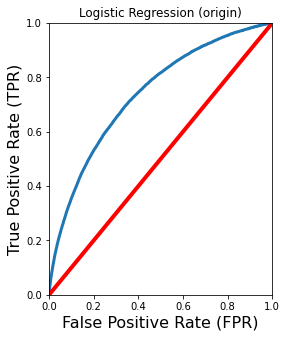

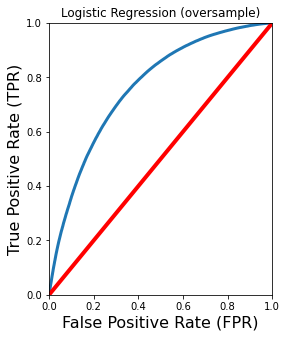

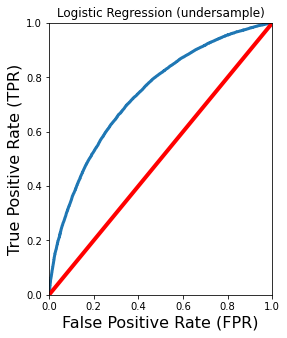

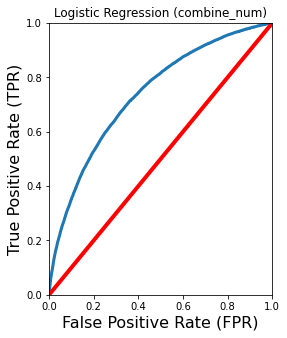

In [ ]:
logRes = LogisticRegression(max_iter=1000)

eval_logres_all = loop_eval_model(logRes, data_all_train,X_test,y_test, "Logistic Regression")

In [ ]:
eval_logres_all

,model,data,precision_test,precision_train,f1_test,f1_train,recall_test,recall_train,accuracy_test,accuracy_train,auc_test,auc_train
0,Logistic Regression,origin,0.918687,"(0.919547331794088,)",0.918687,0.919547,0.918687,0.919547,0.918687,0.919547,0.506120,0.505360
0,Logistic Regression,oversample,0.683398,"(0.6980035190408403,)",0.683398,0.698004,0.683398,0.698004,0.683398,0.698004,0.671475,0.698004
0,Logistic Regression,undersample,0.678731,"(0.674962140333165,)",0.678731,0.674962,0.678731,0.674962,0.678731,0.674962,0.676293,0.674962
0,Logistic Regression,combine_num,0.845942,"(0.7180548544506141,)",0.845942,0.718055,0.845942,0.718055,0.845942,0.718055,0.627867,0.631499


## KNN

### num only

In [ ]:
# highest_score = 0
# highest_score_dt = ""
# KNN = KNeighborsClassifier(n_neighbors=10, leaf_size=10)

# eval_knn_num = pd.DataFrame();
# for dt in data_train:
#     print(dt)
#     KNN.fit(data_train[dt]['X_train'], data_train[dt]['y_train'])
#     eval = eval_model(KNN,X_num_test,y_num_test, data_train[dt]['X_train'], data_train[dt]['y_train'], "KNN", dt)
#     if eval_knn_num.empty:
#         eval_knn_num = pd.DataFrame(eval)
#     else:
#         eval_knn_num = pd.concat([eval_knn_num, pd.DataFrame(eval)])
    
#     print()


In [ ]:
# eval_knn_num

### All Dataset

In [ ]:
# highest_score = 0
# highest_score_dt = ""
# KNN = KNeighborsClassifier(n_neighbors=15, leaf_size=20)
# eval_knn_all = pd.DataFrame()
# for dt in data_all_train:
#     print(dt)
#     KNN.fit(data_all_train[dt]['X_train'], data_all_train[dt]['y_train'])
#     eval = eval_model(KNN,X_test,y_test, data_all_train[dt]['X_train'], data_all_train[dt]['y_train'], "KNN", dt)
#     if eval_knn_all.empty:
#         eval_knn_all = pd.DataFrame(eval)
#     else:
#         eval_knn_all = pd.concat([eval_knn_num, pd.DataFrame(eval)])
    
#     print()


## Ensemble Method - RandomForest Classifier

### num only

In [ ]:
# highest_score = 0
# highest_score_dt = ""
# rf = RandomForestClassifier(n_)

# loop_eval_model(rf, data_train,X_num_test,y_num_test, "Random Forest")


### All Dataset

In [ ]:
# highest_score = 0
# highest_score_dt = ""
# rf = RandomForestClassifier()
# for dt in data_all_train:
#     print(dt)
#     rf.fit(data_all_train[dt]['X_train'], data_all_train[dt]['y_train'])
#     score = eval_model(rf,X_test,y_test, data_all_train[dt]['X_train'], data_all_train[dt]['y_train'])
#     print("precision score:", score)


## XGBoost Classifier

### Num Only

In [ ]:
# from xgboost import XGBClassifier
# xgb = XGBClassifier(max_depth=5, random_state=123)

# eval_xgb_num = loop_eval_model(xgb, data_train,X_num_test,y_num_test, "XGBoost")

In [ ]:
# eval_xgb_num

### All dataset

origin
Train Score
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    226198
           1       0.72      0.01      0.03     19810

    accuracy                           0.92    246008
   macro avg       0.82      0.51      0.49    246008
weighted avg       0.90      0.92      0.88    246008

[[226094    104]
 [ 19539    271]]
Test Score
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56488
           1       0.52      0.01      0.02      5015

    accuracy                           0.92     61503
   macro avg       0.72      0.50      0.49     61503
weighted avg       0.89      0.92      0.88     61503

[[56440    48]
 [ 4962    53]]
oversample
Train Score
              precision    recall  f1-score   support

           0       0.92      1.00      0.95    226198
           1       1.00      0.91      0.95    226198

    accuracy                           0.95    452396
   macro 

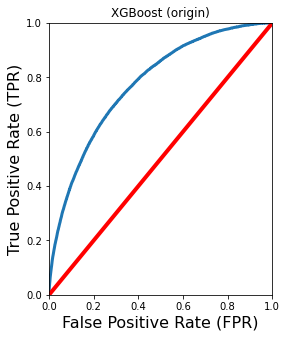

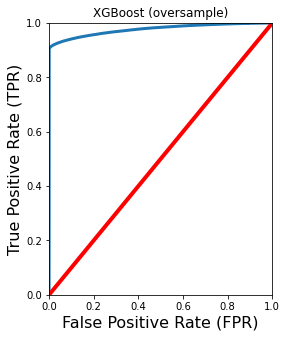

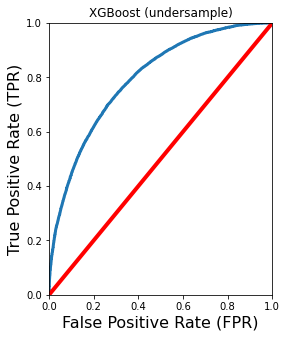

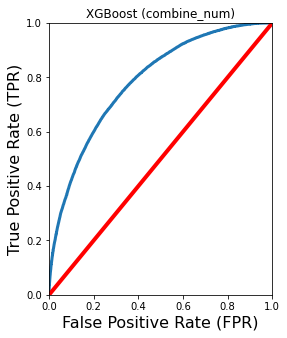

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=5, random_state=123, learning_rate=0.1)

eval_xgb_all = loop_eval_model(xgb, data_all_train,X_test,y_test, "XGBoost")

In [ ]:
eval_xgb_all

,model,data,precision_test,precision_train,f1_test,f1_train,recall_test,recall_train,accuracy_test,accuracy_train,auc_test,auc_train
0,XGBoost,origin,0.918541,"(0.920153003154369,)",0.918541,0.920153,0.918541,0.920153,0.918541,0.920153,0.504859,0.506610
0,XGBoost,oversample,0.917467,"(0.952793570234927,)",0.917467,0.952794,0.917467,0.952794,0.917467,0.952794,0.507546,0.952794
0,XGBoost,undersample,0.688763,"(0.7172892478546189,)",0.688763,0.717289,0.688763,0.717289,0.688763,0.717289,0.686115,0.717289
0,XGBoost,combine_num,0.842691,"(0.7410230523304728,)",0.842691,0.741023,0.842691,0.741023,0.842691,0.741023,0.641541,0.662317


## LGBM Classifier

### Num Only

In [ ]:
# import lightgbm as lgb
# # max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000
# clf = lgb.LGBMClassifier(max_depth=-1, random_state=314)
# eval_lgb_num = loop_eval_model(clf, data_train,X_num_test,y_num_test, "LGBoost")

In [ ]:
# eval_lgb_num

### All Dataset

In [ ]:
# clf = lgb.LGBMClassifier()
# eval_lgb_all = loop_eval_model(clf, data_all_train,X_test,y_test, "LGBoost")

In [ ]:
# eval_lgb_all

#Feature Selection

In [ ]:
# feat_imp = pd.Series(xgb.feature_importances_, index=cols_all)
# feat_imp.nlargest(20).plot(kind='barh', figsize=(8,10))

In [ ]:

# important_cols = feat_imp.nlargest(20).index.to_list()
# important_cols.append("TARGET")
# df_important = df_all[important_cols]

# X = df_important.drop(["TARGET"],1)
# y = df_important['TARGET']

# df_important.head()

In [ ]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 123)
# print(X_train.shape, y_train.shape)
# print(y_train.value_counts())
# print(X_test.shape, y_test.shape)
# print(y_test.value_counts())

In [ ]:
# X_train.columns

In [ ]:
# X_test.columns

In [ ]:
# oversample = SMOTE(random_state=123)
# undersample = RandomUnderSampler(sampling_strategy='majority', random_state=123)

# print("origin")
# print(X_train.shape, y_train.shape)
# (unique, counts) = np.unique(y_train, return_counts=True)
# print(np.asarray((unique, counts)).T)

# print("oversample")
# X_train_o, y_train_o = oversample.fit_resample(X_train, y_train)
# print(X_train_o.shape, y_train_o.shape)
# (unique, counts) = np.unique(y_train_o, return_counts=True)
# print(np.asarray((unique, counts)).T)

# print("undersample")
# X_train_u, y_train_u = undersample.fit_resample(X_train, y_train)
# print(X_train_u.shape, y_train_u.shape)
# (unique, counts) = np.unique(y_train_u, return_counts=True)
# print(np.asarray((unique, counts)).T)

# print("combine")
# over = SMOTE(sampling_strategy=0.1, random_state=123)
# X_train_c, y_train_c = over.fit_resample(X_train, y_train)
# under = RandomUnderSampler(sampling_strategy=0.5, random_state=123)
# X_train_c, y_train_c = under.fit_resample(X_train, y_train)
# print(X_train_c.shape, y_train_c.shape)
# (unique, counts) = np.unique(y_train_c, return_counts=True)
# print(np.asarray((unique, counts)).T)

# data_imp_train = {"origin":{"X_train":X_train.to_numpy(), "y_train": y_train}, 
#                    "oversample":{"X_train":X_train_o, "y_train": y_train_o},
#                   "undersample":{"X_train":X_train_u, "y_train": y_train_u},
#                   "combine_num":{"X_train":X_train_c, "y_train": y_train_c}
#                 }
# X_test = X_test.to_numpy()

In [ ]:
# final_xgb = XGBClassifier(max_depth=5, random_state=123)

# eval_xgb_all = loop_eval_model(final_xgb, data_imp_train,X_test,y_test, "XGBoost")

In [ ]:
# eval_xgb_all

# Final Model

In [ ]:
final_xgb_u = XGBClassifier(max_depth=5, random_state=123)
final_xgb_u.fit(X_train_u, y_train_u)
get_cross_val(model=final_xgb_u, Xtrain=X_train_u, ytrain=y_train_u, cv=100) 
#0.680433847762054 

0.680433847762054

In [ ]:
final_xgb_c = XGBClassifier(max_depth=5, random_state=123)
final_xgb_c.fit(X_train_c, y_train_c)
get_cross_val(model=final_xgb_c, Xtrain=X_train_c, ytrain=y_train_c, cv=100)
# 0.4861806106437108

0.4861806106437108

In [ ]:
final_logress_u = LogisticRegression()
final_logress_u.fit(X_train_u, y_train_u)
get_cross_val(model=final_logress_u, Xtrain=X_train_u, ytrain=y_train_u, cv=30) 
# 0.67

0.6717786277717525

In [ ]:
final_logress_c = LogisticRegression(max_iter=1000)
final_logress_c.fit(X_train_c, y_train_c)
get_cross_val(model=final_logress_c, Xtrain=X_train_c, ytrain=y_train_c, cv=30) 
# 0.47

0.465498637190681

In [ ]:
df_test = pd.read_csv(f"{path}/application_test.csv", encoding='unicode_escape')
SK_ID_CURR = df_test[["SK_ID_CURR"]]
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [ ]:
# print(checknull(df_test).shape)
# checknull(df_test)
dropped_cols.to_numpy()

array(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE'], dtype=object)

In [ ]:
# df_test = drop_null_cols(df_test)
print(df_test.shape)
df_test = df_test.drop(dropped_cols.to_numpy(), axis=1)
df_test = df_test.drop(irrelevant_columns, axis=1)
df_test = fill_nulls(df_test)
df_test.loc[:, 'CNT_FAM_MEMBERS'] = df_test.apply(lambda row: round(row['CNT_FAM_MEMBERS']), axis=1)
print(df_test.shape)

(48744, 121)
(48744, 70)


In [ ]:
print(checknull(df_test).shape)
checknull(df_test)

(0, 3)


,column,type,total


In [ ]:
df_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,Laborers,2,2,2,18,0,0,0,0,0,0,Kindergarten,0.789654,0.159520,0.0660,0.9732,0.00,0.1379,0.1250,0.0505,0.0672,0.9732,0.0000,0.1379,0.1250,0.0526,0.0666,0.9732,0.00,0.1379,0.1250,0.0514,block of flats,0.0392,0.0,0.0,0.0,0.0,-1740.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,Low-skill Laborers,2,2,2,9,0,0,0,0,0,0,Self-employed,0.291656,0.432962,0.0928,0.9816,0.00,0.1379,0.1667,0.0770,0.0851,0.9816,0.0000,0.1379,0.1667,0.0751,0.0926,0.9816,0.00,0.1379,0.1667,0.0776,block of flats,0.0707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,Drivers,2,2,2,14,0,0,0,0,0,0,Transport: type 3,0.699787,0.610991,0.0928,0.9816,0.00,0.1379,0.1667,0.0770,0.0851,0.9816,0.0000,0.1379,0.1667,0.0751,0.0926,0.9816,0.00,0.1379,0.1667,0.0776,block of flats,0.0707,0.0,0.0,0.0,0.0,-856.0,0.0,0.0,0.0,0.0,1.0,4.0
3,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,Sales staff,4,2,2,11,0,0,0,0,0,0,Business Entity Type 3,0.509677,0.612704,0.3052,0.9970,0.32,0.2759,0.3750,0.3673,0.3109,0.9970,0.3222,0.2759,0.3750,0.3827,0.3081,0.9970,0.32,0.2759,0.3750,0.3739,block of flats,0.3700,0.0,0.0,0.0,0.0,-1805.0,0.0,0.0,0.0,0.0,0.0,3.0
4,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,Laborers,3,2,2,5,0,0,0,0,1,1,Business Entity Type 3,0.425687,0.519097,0.0928,0.9816,0.00,0.1379,0.1667,0.0770,0.0851,0.9816,0.0000,0.1379,0.1667,0.0751,0.0926,0.9816,0.00,0.1379,0.1667,0.0776,block of flats,0.0707,0.0,0.0,0.0,0.0,-821.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
df_test = ext_source_cols(df_test)
df_test.loc[:, "DAYS_BIRTH"] = df_test.apply(lambda row: classified_age(row['DAYS_BIRTH']), axis=1)                   # 

In [ ]:
label = [['Academic degree',5],['Higher education',4],['Incomplete higher',3],['Secondary / secondary special',2],['Lower secondary',1]]
df_test,encoder = encode_ordinal_col(df_test, "NAME_EDUCATION_TYPE", label)
df_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_MEAN,EXT_SOURCE_STD
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,1.0,Married,House / apartment,0.018850,4,-2329,-5170.0,-812,1,1,0,1,0,1,Laborers,2,2,2,18,0,0,0,0,0,0,Kindergarten,0.0660,0.9732,0.00,0.1379,0.1250,0.0505,0.0672,0.9732,0.0000,0.1379,0.1250,0.0526,0.0666,0.9732,0.00,0.1379,0.1250,0.0514,block of flats,0.0392,0.0,0.0,0.0,0.0,-1740.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344070,0.387777
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,4.0,Married,House / apartment,0.035792,3,-4469,-9118.0,-1623,1,1,0,1,0,0,Low-skill Laborers,2,2,2,9,0,0,0,0,0,0,Self-employed,0.0928,0.9816,0.00,0.1379,0.1667,0.0770,0.0851,0.9816,0.0000,0.1379,0.1667,0.0751,0.0926,0.9816,0.00,0.1379,0.1667,0.0776,block of flats,0.0707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.345295,0.076552
2,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Unaccompanied,Working,1.0,Married,House / apartment,0.019101,4,-4458,-2175.0,-3503,1,1,0,1,0,0,Drivers,2,2,2,14,0,0,0,0,0,0,Transport: type 3,0.0928,0.9816,0.00,0.1379,0.1667,0.0770,0.0851,0.9816,0.0000,0.1379,0.1667,0.0751,0.0926,0.9816,0.00,0.1379,0.1667,0.0776,block of flats,0.0707,0.0,0.0,0.0,0.0,-856.0,0.0,0.0,0.0,0.0,1.0,4.0,0.436926,0.380985
3,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,4.0,Married,House / apartment,0.026392,2,-1866,-2000.0,-4208,1,1,0,1,1,0,Sales staff,4,2,2,11,0,0,0,0,0,0,Business Entity Type 3,0.3052,0.9970,0.32,0.2759,0.3750,0.3673,0.3109,0.9970,0.3222,0.2759,0.3750,0.3827,0.3081,0.9970,0.32,0.2759,0.3750,0.3739,block of flats,0.3700,0.0,0.0,0.0,0.0,-1805.0,0.0,0.0,0.0,0.0,0.0,3.0,0.374127,0.328073
4,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,4.0,Married,House / apartment,0.010032,2,-2191,-4000.0,-4262,1,1,1,1,0,0,Laborers,3,2,2,5,0,0,0,0,1,1,Business Entity Type 3,0.0928,0.9816,0.00,0.1379,0.1667,0.0770,0.0851,0.9816,0.0000,0.1379,0.1667,0.0751,0.0926,0.9816,0.00,0.1379,0.1667,0.0776,block of flats,0.0707,0.0,0.0,0.0,0.0,-821.0,0.0,0.0,0.0,0.0,0.0,2.0,0.314928,0.276706


In [ ]:
# df_test = encode_cat_cols(df_test, "TARGET")
# data_encoded.head()
test = df_test.copy()
for col in df_test.select_dtypes(include=['object']).columns:
    print(col)
    # print(df_test[[col]].value_counts())
    encoded_val = data_encoded.loc[data_encoded.columns_name == col]
    # test.loc[:, col] = test.apply(lambda row: encoded_val.loc[(encoded_val.real_values == row[col])]['encoded_values'], axis=1)
    test = pd.merge(test, encoded_val, left_on=col, right_on="real_values", how="left")
    test.drop(["columns_name", "real_values", col],axis=1, inplace=True)
    test.rename(columns={'encoded_values': col}, inplace=True)
    # print(encoded_val)

test.head()

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
ORGANIZATION_TYPE
HOUSETYPE_MODE


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_MEAN,EXT_SOURCE_STD,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,HOUSETYPE_MODE
0,0,135000.0,568800.0,20560.5,450000.0,1.0,0.018850,4,-2329,-5170.0,-812,1,1,0,1,0,1,2,2,2,18,0,0,0,0,0,0,0.0660,0.9732,0.00,0.1379,0.1250,0.0505,0.0672,0.9732,0.0000,0.1379,0.1250,0.0526,0.0666,0.9732,0.00,0.1379,0.1250,0.0514,0.0392,0.0,0.0,0.0,0.0,-1740.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344070,0.387777,0.083459,0.069993,0.085002,0.079616,0.081687,0.095885,0.075599,0.077957,0.079933,0.070349,0.08061
1,0,99000.0,222768.0,17370.0,180000.0,4.0,0.035792,3,-4469,-9118.0,-1623,1,1,0,1,0,0,2,2,2,9,0,0,0,0,0,0,0.0928,0.9816,0.00,0.1379,0.1667,0.0770,0.0851,0.9816,0.0000,0.1379,0.1667,0.0751,0.0926,0.9816,0.00,0.1379,0.1667,0.0776,0.0707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.345295,0.076552,0.083459,0.101419,0.085002,0.079616,0.081687,0.095885,0.075599,0.077957,0.171524,0.101739,0.08061
2,0,202500.0,663264.0,69777.0,630000.0,1.0,0.019101,4,-4458,-2175.0,-3503,1,1,0,1,0,0,2,2,2,14,0,0,0,0,0,0,0.0928,0.9816,0.00,0.1379,0.1667,0.0770,0.0851,0.9816,0.0000,0.1379,0.1667,0.0751,0.0926,0.9816,0.00,0.1379,0.1667,0.0776,0.0707,0.0,0.0,0.0,0.0,-856.0,0.0,0.0,0.0,0.0,1.0,4.0,0.436926,0.380985,0.083459,0.101419,0.072437,0.079616,0.081687,0.095885,0.075599,0.077957,0.113261,0.157540,0.08061
3,2,315000.0,1575000.0,49018.5,1575000.0,4.0,0.026392,2,-1866,-2000.0,-4208,1,1,0,1,1,0,4,2,2,11,0,0,0,0,0,0,0.3052,0.9970,0.32,0.2759,0.3750,0.3673,0.3109,0.9970,0.3222,0.2759,0.3750,0.3827,0.3081,0.9970,0.32,0.2759,0.3750,0.3739,0.3700,0.0,0.0,0.0,0.0,-1805.0,0.0,0.0,0.0,0.0,0.0,3.0,0.374127,0.328073,0.083459,0.069993,0.085002,0.079616,0.081687,0.095885,0.075599,0.077957,0.096318,0.092996,0.08061
4,1,180000.0,625500.0,32067.0,625500.0,4.0,0.010032,2,-2191,-4000.0,-4262,1,1,1,1,0,0,3,2,2,5,0,0,0,0,1,1,0.0928,0.9816,0.00,0.1379,0.1667,0.0770,0.0851,0.9816,0.0000,0.1379,0.1667,0.0751,0.0926,0.9816,0.00,0.1379,0.1667,0.0776,0.0707,0.0,0.0,0.0,0.0,-821.0,0.0,0.0,0.0,0.0,0.0,2.0,0.314928,0.276706,0.083459,0.101419,0.072437,0.083249,0.081687,0.095885,0.075599,0.077957,0.079933,0.092996,0.08061


In [ ]:
df_test = test.copy()
del test

In [ ]:
data_encoded.head()

,columns_name,real_values,encoded_values
0,NAME_CONTRACT_TYPE,Cash loans,0.083459
1,NAME_CONTRACT_TYPE,Revolving loans,0.054783
0,CODE_GENDER,F,0.069993
1,CODE_GENDER,M,0.101419
2,CODE_GENDER,XNA,0.000000


In [ ]:
X = df_test

cols_all = X.columns
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X) 

In [ ]:
# pd.DataFrame(logRes.predict(X), columns=["TARGET"]).value_counts()

In [ ]:
# pd.DataFrame(logRes.predict_proba(X))[1]
prob = final_logress_u.predict_proba(X)
submission = pd.DataFrame({"SK_ID_CURR":SK_ID_CURR['SK_ID_CURR'].to_list(), "TARGET":[row[1] for row in prob]})

submission.to_csv("submission_logres_undersampling_tuning.csv", index=False)




# Main Note

## Notes

1. Understand dataset - Understanding the data
2. Identify which activity shoud be done - Understand each column, check if there is missing values or duplicate values, know what does each row mean?
3. Analyze (use statistics and EDA) - Data distribution each column, interaction between one to another data, visualize, **get insight of data**
4. Pre-processing


## Question to ask 

### About columns

1. AMT_INCOME_TOTAL per month? - Per Year
2. AMT_ANNUITY, what does this column mean is the number of installments that have been paid for the loan in that row? - Yes
3. What are these? (OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE) - Observable or defaulted social surrounding with active or defaulted loan
4. What application means in this context? (Ex: on column DAYS_LAST_PHONE_CHANGE) - Apply loan
5. What/Who is Credit Bureau? - Company or Organization that sell or provide data of loan records

# Source to read

1. Cross validation: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85